# Imports

In [ ]:
!pip install tensorflow sweetviz windrose openpyxl

     |████████████████████████████████| 15.1 MB 6.2 MB/s 


In [ ]:
# To install pandas profiler, run the following command:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 25.9 MB 920 kB/s
     |████████████████████████████████| 10.1 MB 6.5 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 102 kB 15.2 MB/s 
     |████████████████████████████████| 675 kB 52.8 MB/s 
     |████████████████████████████████| 4.7 MB 58.3 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 38.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=b3a7b8e6758ffabdf092890161ed1d37e462e8ed19de33a035e69fe2f264dd7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ac1133wv/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5f263ee606bc0df04e247cd167a4e119b81789a26f75d53a7154dcaa020460f2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [ ]:
import tensorflow as tf
import sweetviz as sv
from pandas_profiling import ProfileReport

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import scipy as sc
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes

# matplotlib options
import warnings
warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=1000)
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Functions

In [ ]:
def whiskers_lines(arr, *args):
  iqr = sc.stats.iqr(arr)
  avg = np.mean(arr)
  q3 = np.percentile(arr, 75)
  q1 = np.percentile(arr, 25)
  low_value = q1-(1.5*iqr)
  high_value = q3+(1.5*iqr)
  print(low_value, high_value)
  avg_line = np.full((164094,), avg)
  low_perc = np.full((164094,), low_value)
  upper_perc = np.full((164094,), high_value)
  return avg_line, low_perc, upper_perc

# Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project Deep Learning/Data/Case3/Proj_NWP_Case3.csv")

In [ ]:
def accuracy_rate(act_power, forecast_power, cap, n = 96, *args):
  numerator = (np.sqrt(sum((act_power[i]-forecast_power[i])^2 for i in len(act_power))))
  denominator = np.sqrt(n) * cap
  return 100 * (1 - (numerator / denominator))

#Exploratory Data Analysis

In [ ]:
df.describe()

Direction_10m      Speed_10m  ...  Temperature_150m  Air Density_150m
count  164094.000000  164094.000000  ...     164094.000000     164094.000000
mean      196.231282       3.038068  ...          8.282799          1.235723
std        89.052316       1.494551  ...         13.600326          0.070183
min         0.000000       0.000000  ...        -25.800000          1.109000
25%       144.000000       2.000000  ...         -2.990000          1.174000
50%       207.000000       2.700000  ...          9.730000          1.225000
75%       256.000000       3.840000  ...         20.130000          1.292000
max       359.000000      11.000000  ...         35.800000          1.432000

[8 rows x 17 columns]

In [ ]:
df.sample(10)

Date_Time  Direction_10m  ...  Temperature_150m  Air Density_150m
111404  2019-03-14 07:00:00            213  ...             -2.19             1.283
28127   2016-10-20 19:45:00             58  ...              3.88             1.265
71988   2018-01-21 17:00:00            355  ...            -14.10             1.355
160063  2020-08-04 03:45:00            194  ...             23.14             1.155
54248   2017-07-19 22:00:00            143  ...             22.55             1.160
74439   2018-02-16 05:45:00            243  ...             -7.22             1.303
60337   2017-09-22 08:15:00            208  ...             17.47             1.186
4868    2016-02-21 13:00:00            247  ...             -4.34             1.305
50575   2017-06-11 15:45:00             26  ...             20.84             1.176
111555  2019-03-15 20:45:00            303  ...             -2.87             1.287

[10 rows x 18 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164094 entries, 0 to 164093
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_Time          164094 non-null  object 
 1   Direction_10m      164094 non-null  int64  
 2   Speed_10m          164094 non-null  float64
 3   Temperature_10m    164094 non-null  float64
 4   Pressure_seaLevel  164094 non-null  float64
 5   Air Density_10m    164094 non-null  float64
 6   Direction_50m      164094 non-null  int64  
 7   Speed_50m          164094 non-null  float64
 8   Temperature_50m    164094 non-null  float64
 9   Air Density_50m    164094 non-null  float64
 10  Direction_100m     164094 non-null  int64  
 11  Speed_100m         164094 non-null  float64
 12  Temperature_100m   164094 non-null  float64
 13  Air Density_100m   164094 non-null  float64
 14  Direction_150m     164094 non-null  int64  
 15  Speed_150m         164094 non-null  float64
 16  Te

In [ ]:
df["Date_Time"] = pd.to_datetime(df.Date_Time, errors = "coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164094 entries, 0 to 164093
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_Time          164094 non-null  datetime64[ns]
 1   Direction_10m      164094 non-null  int64         
 2   Speed_10m          164094 non-null  float64       
 3   Temperature_10m    164094 non-null  float64       
 4   Pressure_seaLevel  164094 non-null  float64       
 5   Air Density_10m    164094 non-null  float64       
 6   Direction_50m      164094 non-null  int64         
 7   Speed_50m          164094 non-null  float64       
 8   Temperature_50m    164094 non-null  float64       
 9   Air Density_50m    164094 non-null  float64       
 10  Direction_100m     164094 non-null  int64         
 11  Speed_100m         164094 non-null  float64       
 12  Temperature_100m   164094 non-null  float64       
 13  Air Density_100m   164094 non-null  float64 

## Feature Statistics overview

First we are going to look at how the different fields 

                                             |          | [  0%]   00:00 -> (? left)


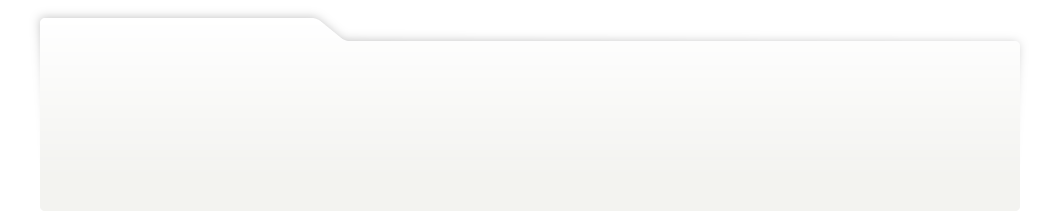
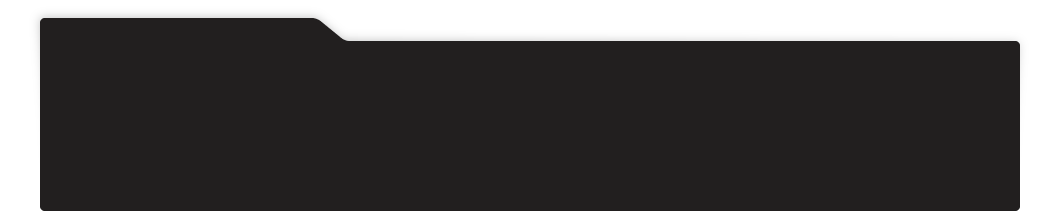
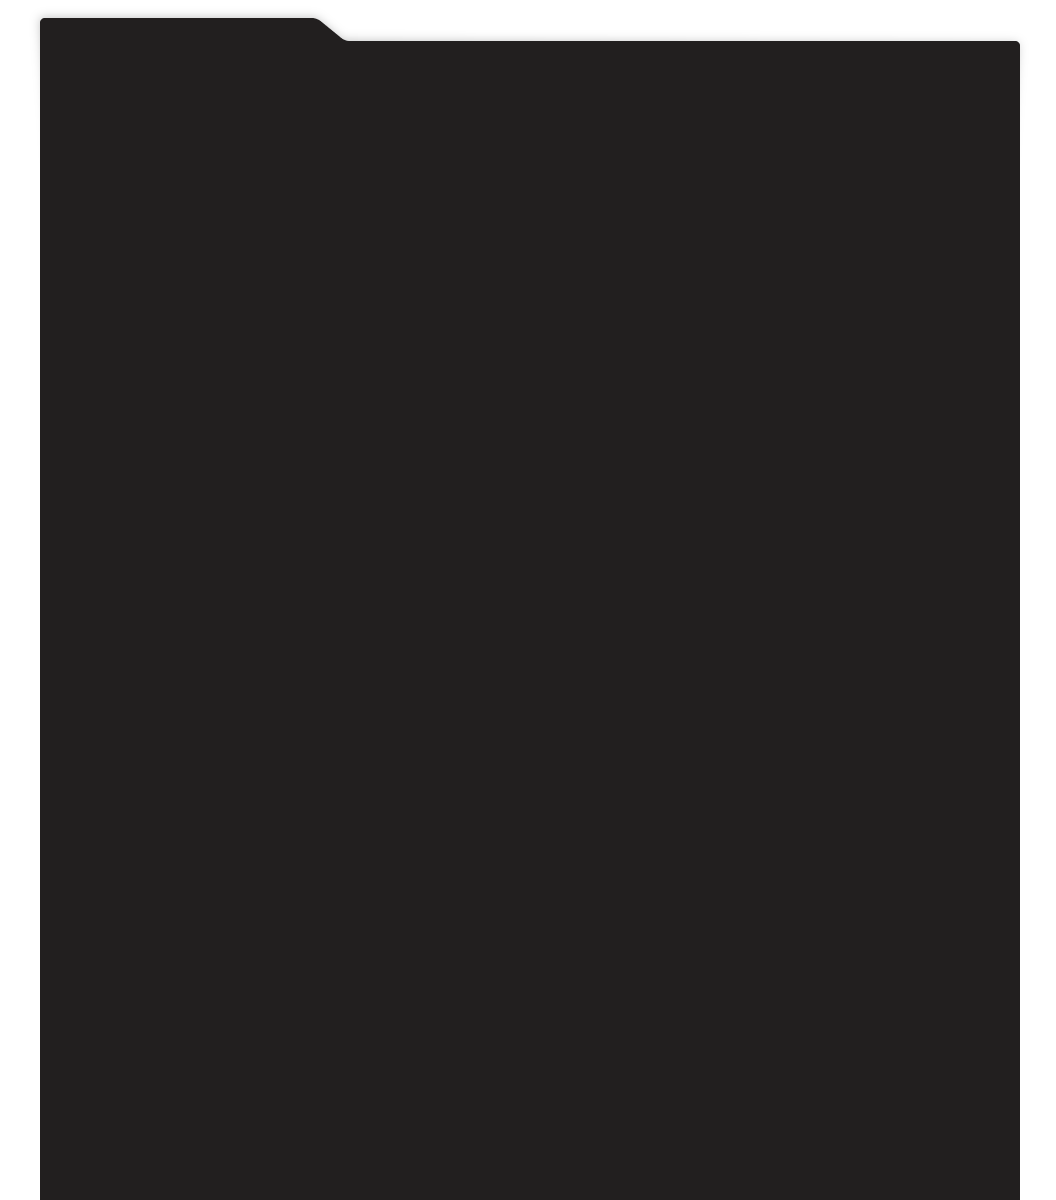
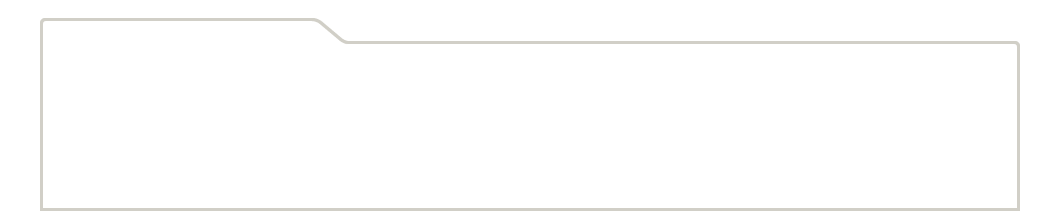
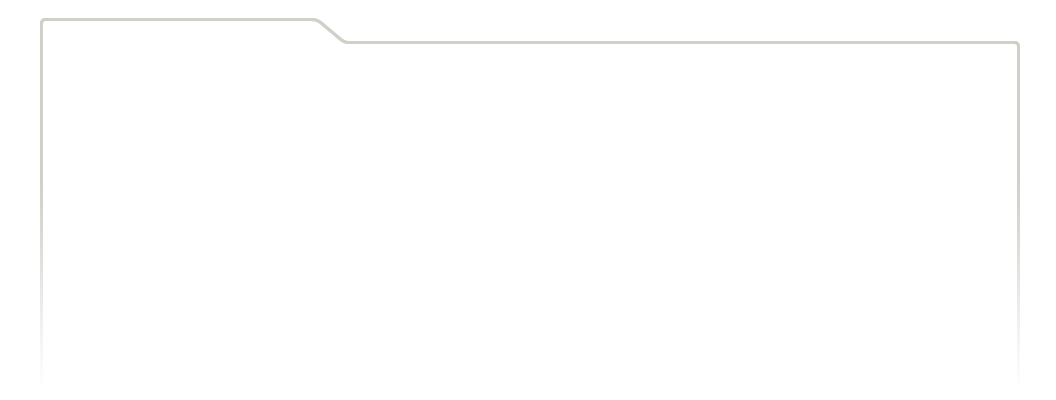
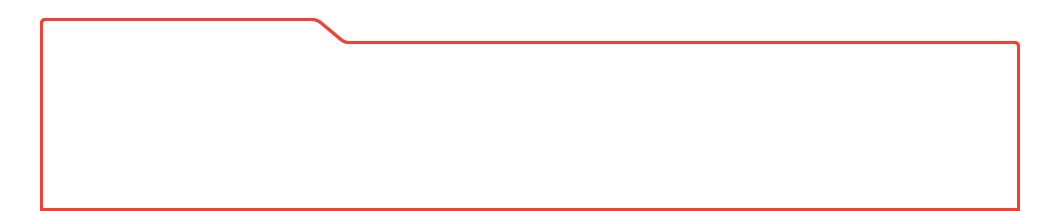
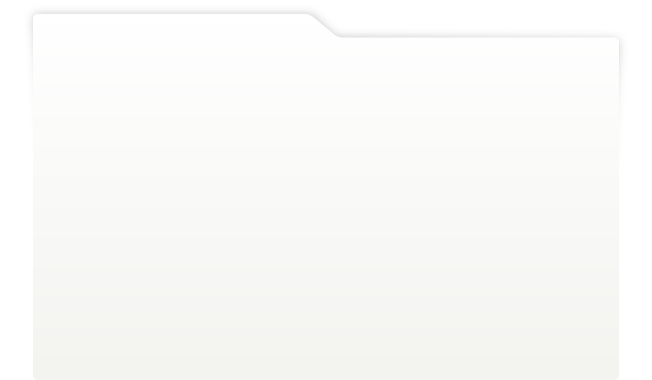
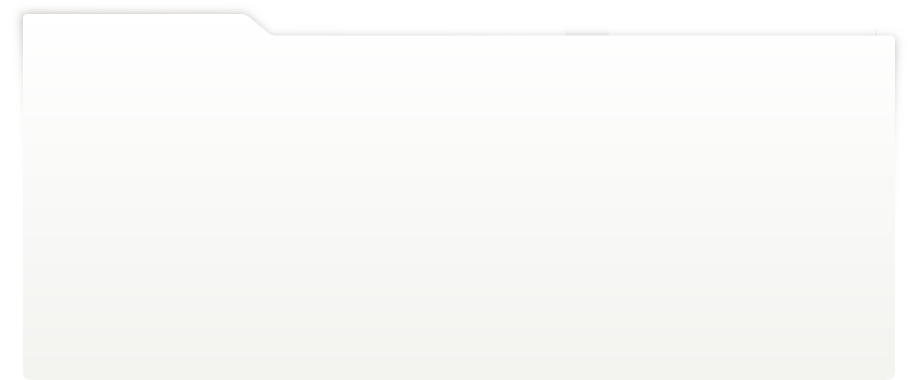
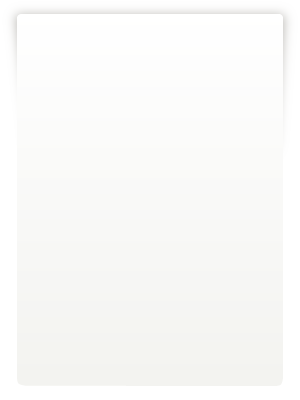
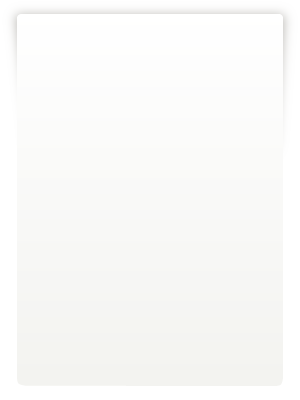
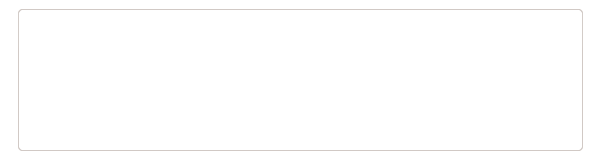
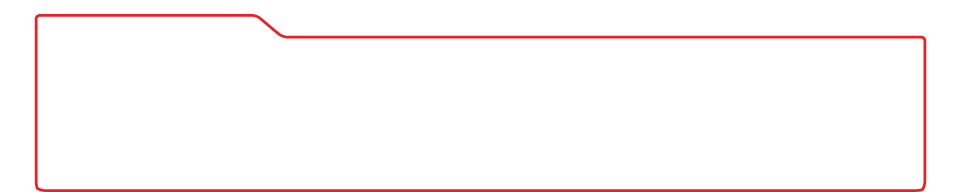
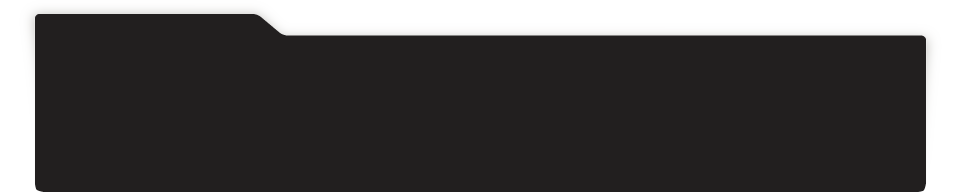
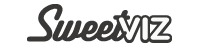
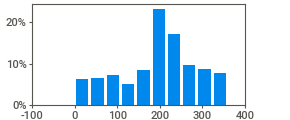
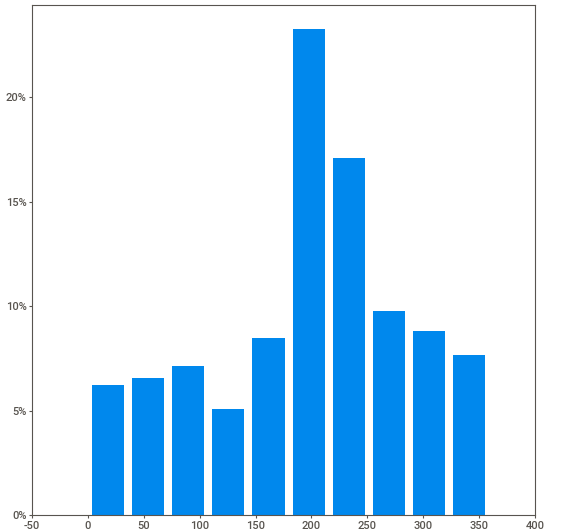
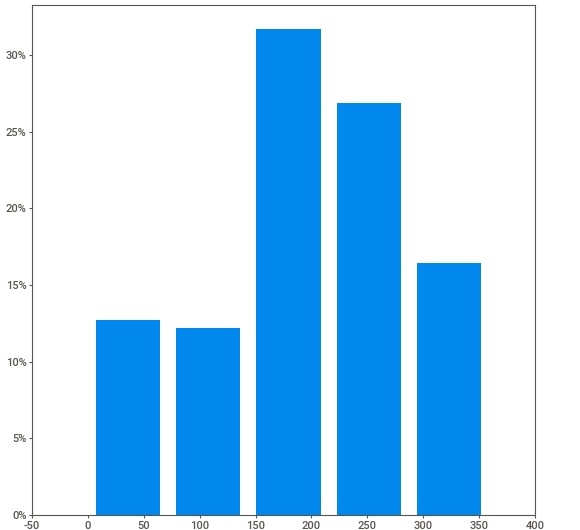
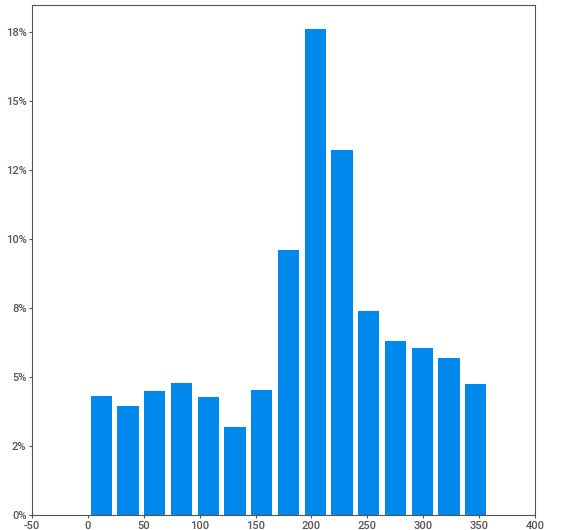
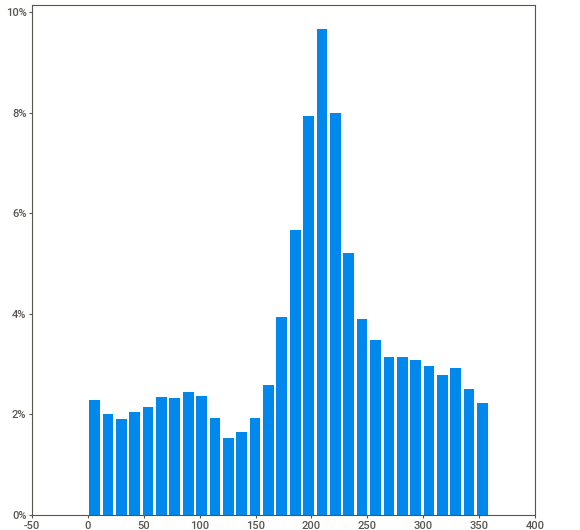
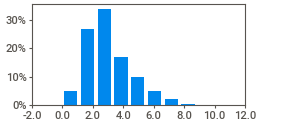
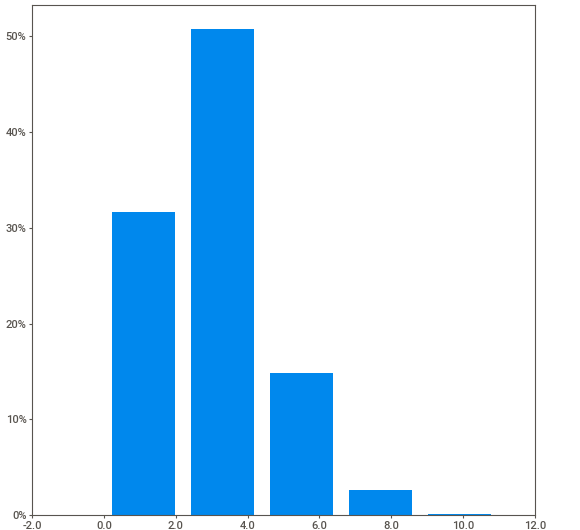
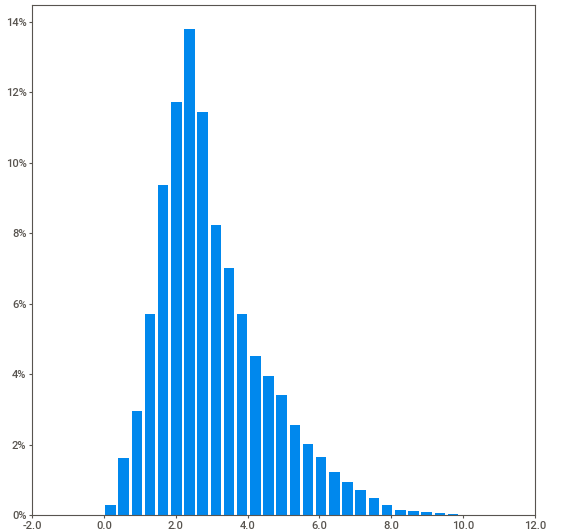
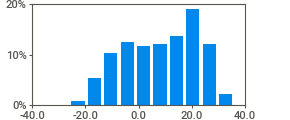
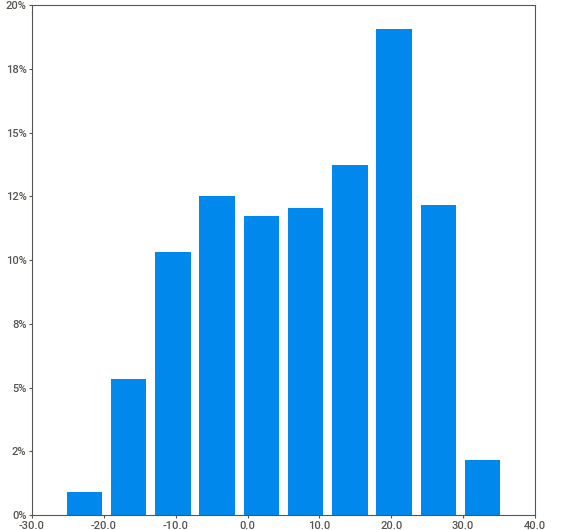
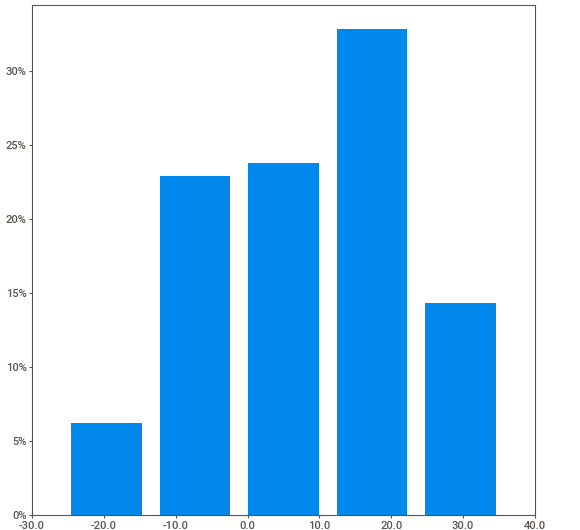
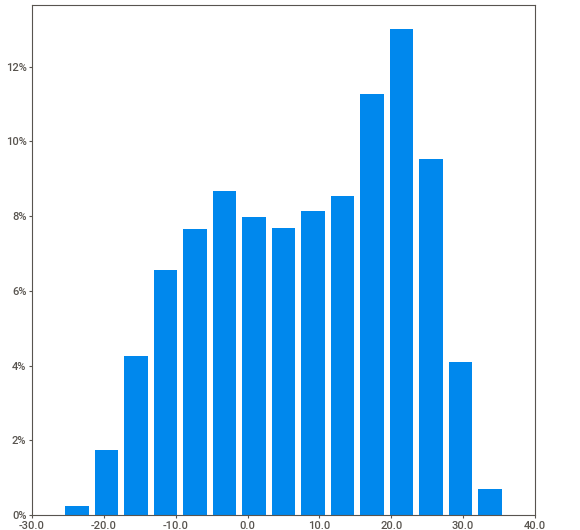
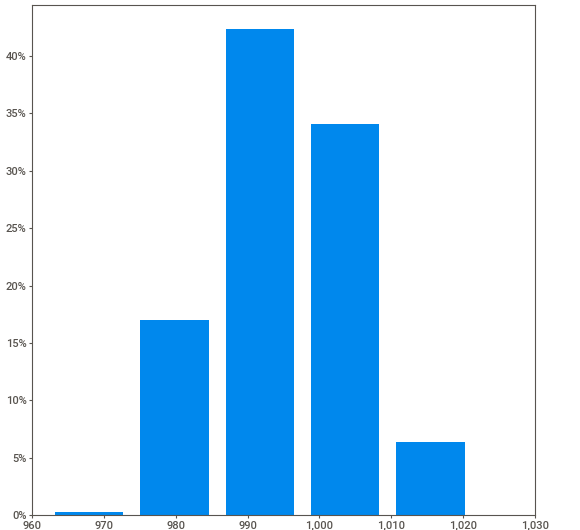
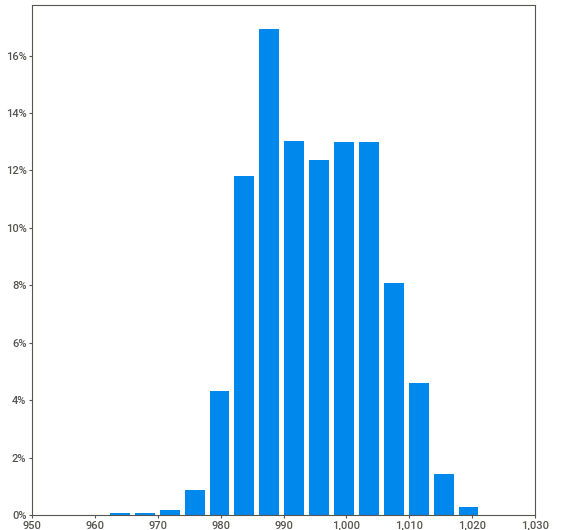
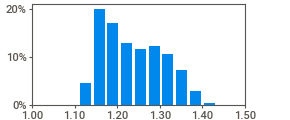
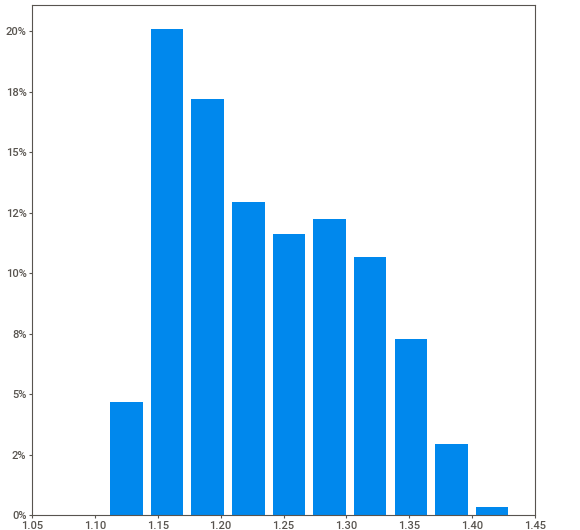
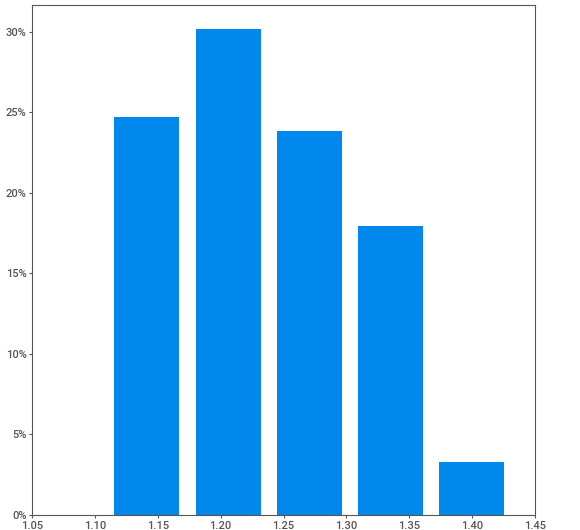
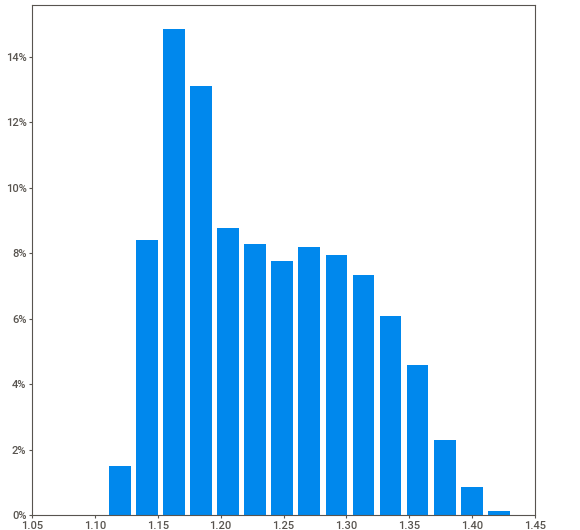
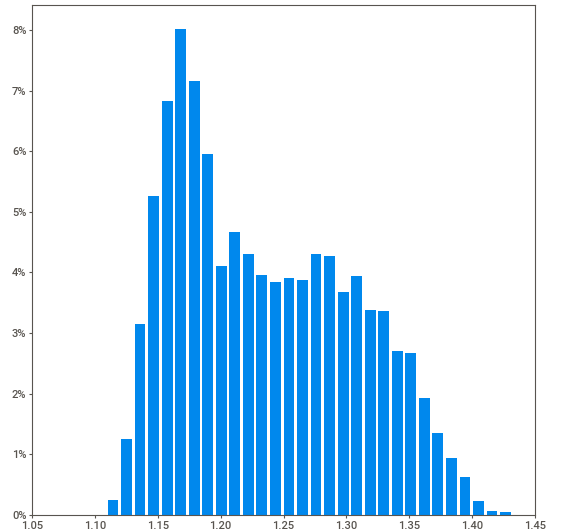
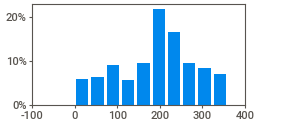
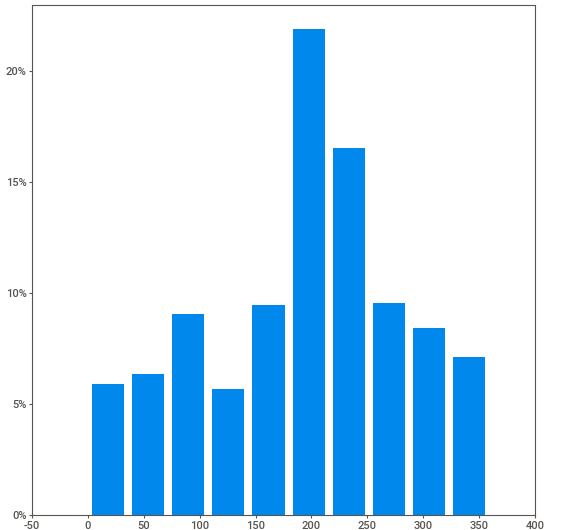
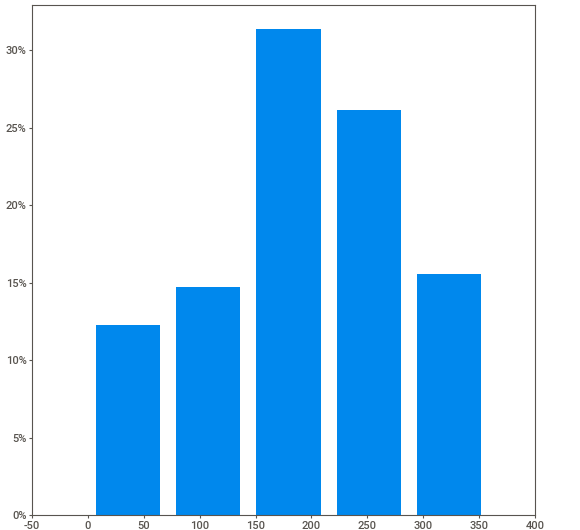
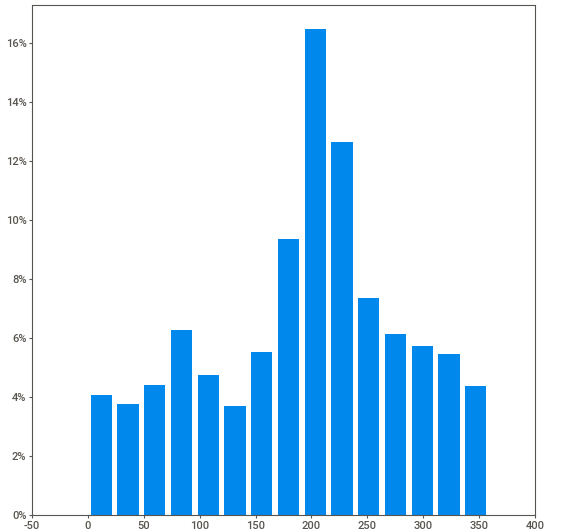
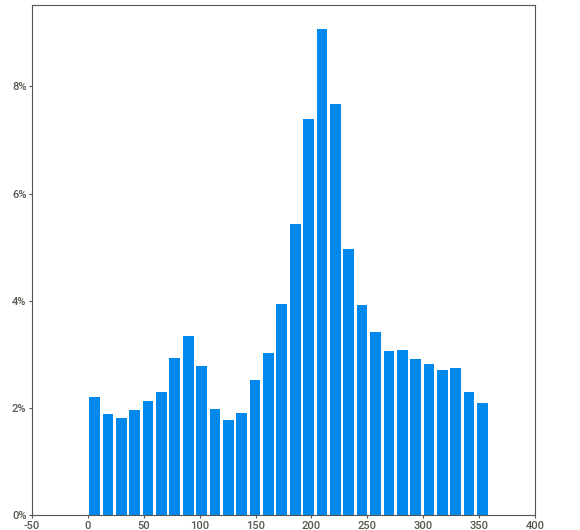
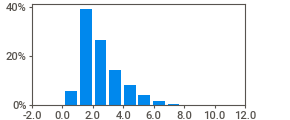
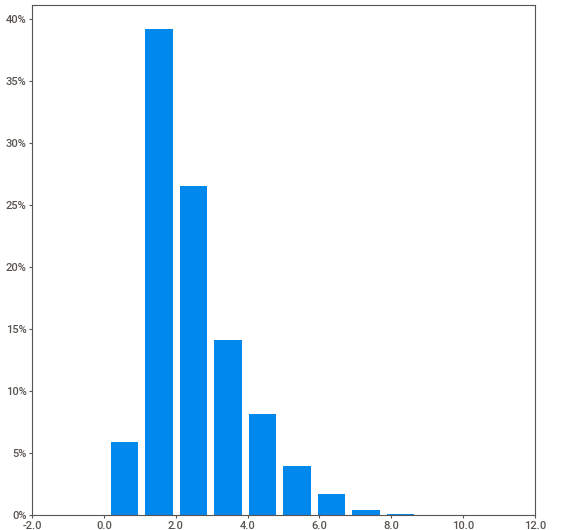
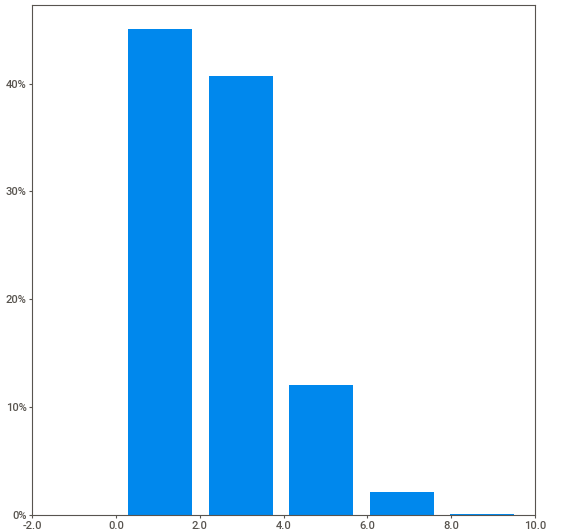
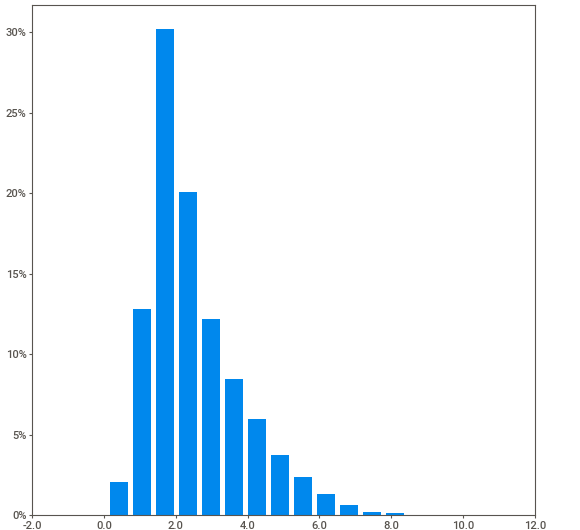
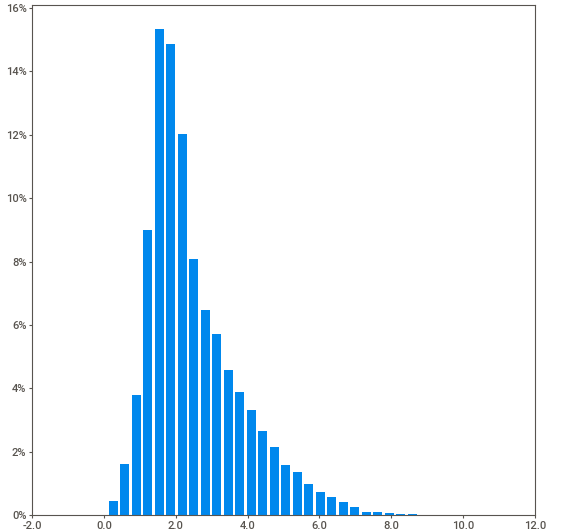
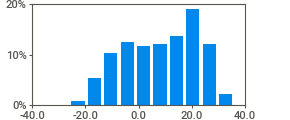
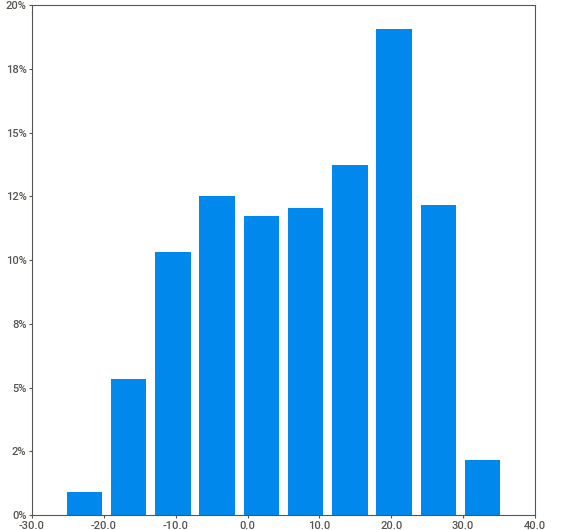
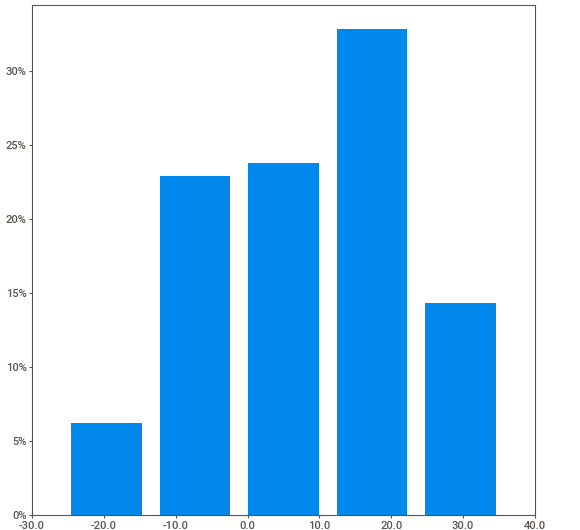
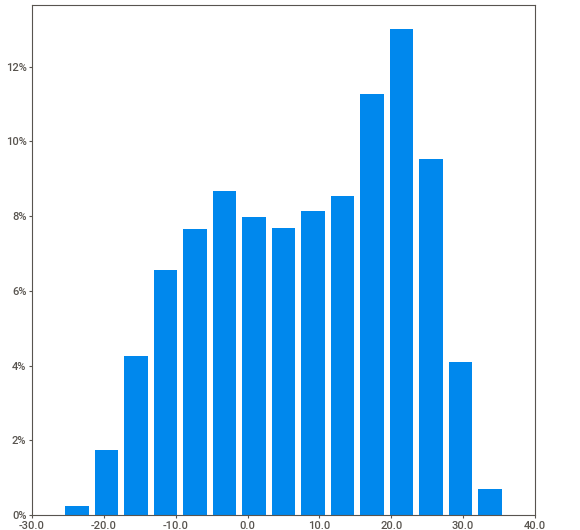
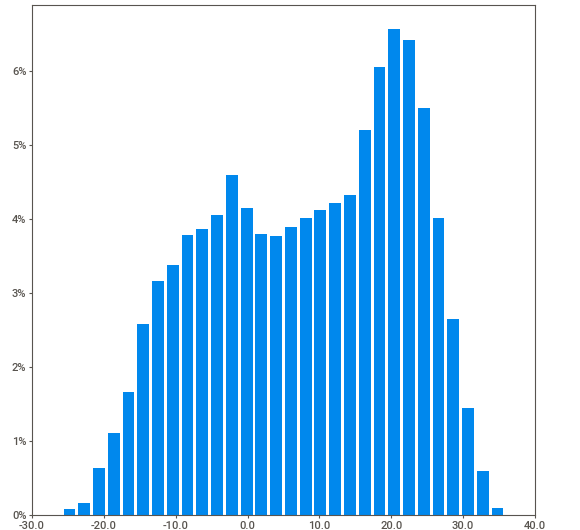
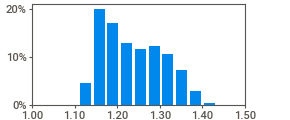
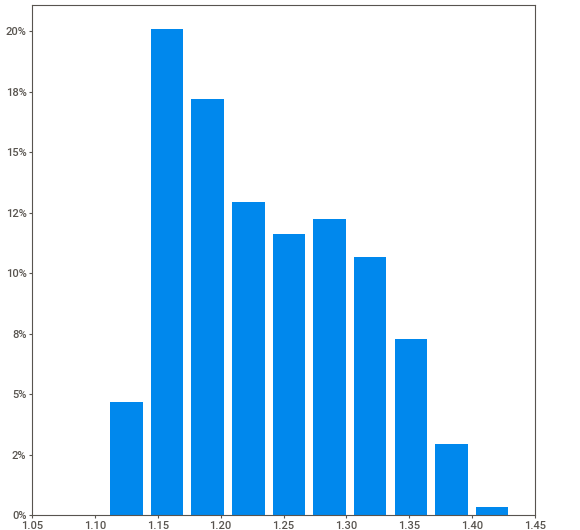
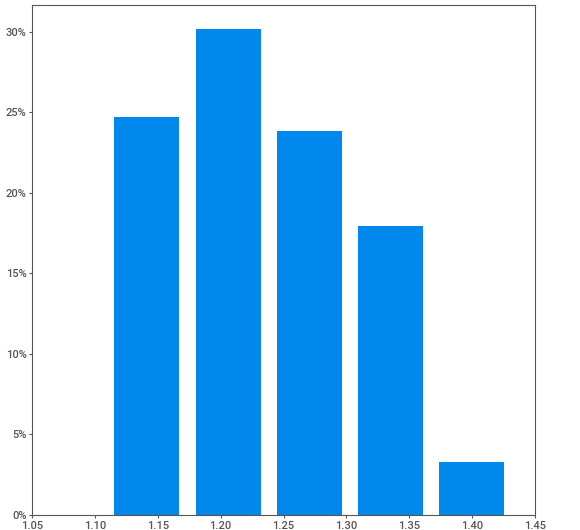
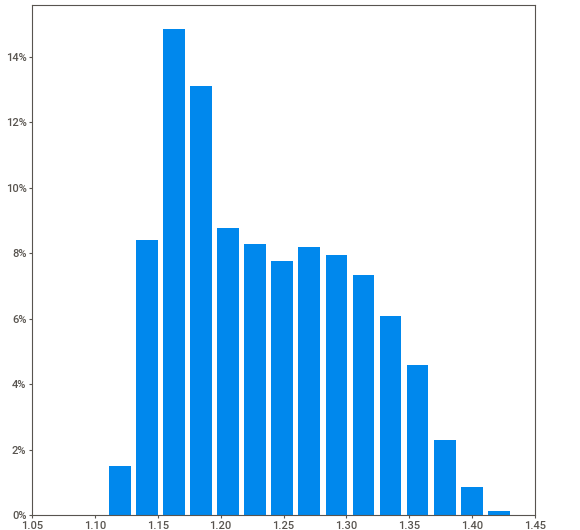
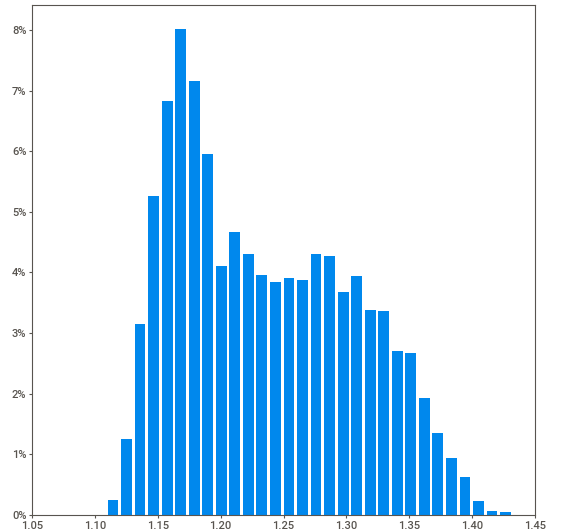
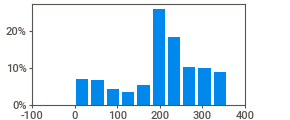
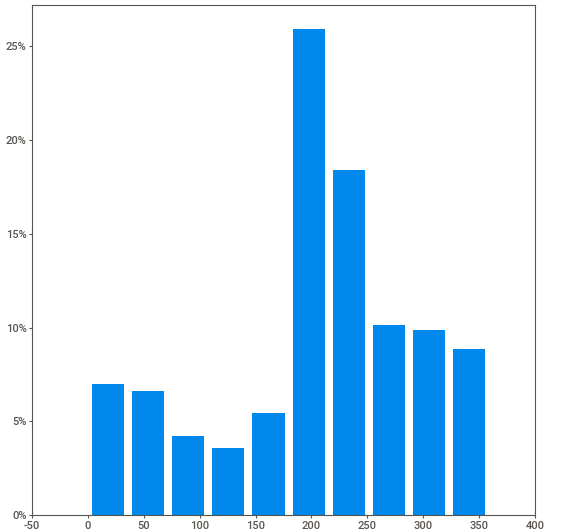
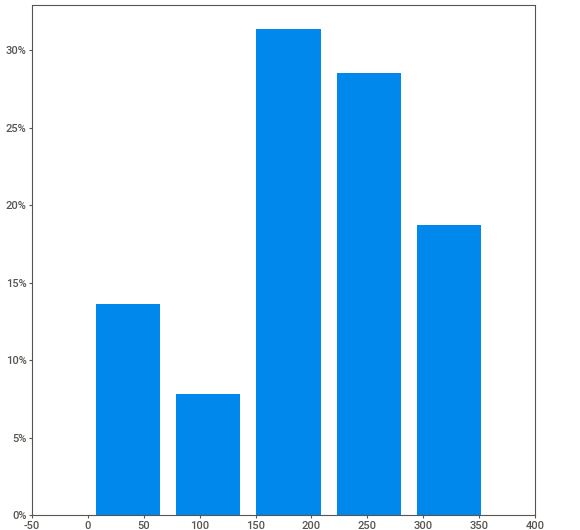
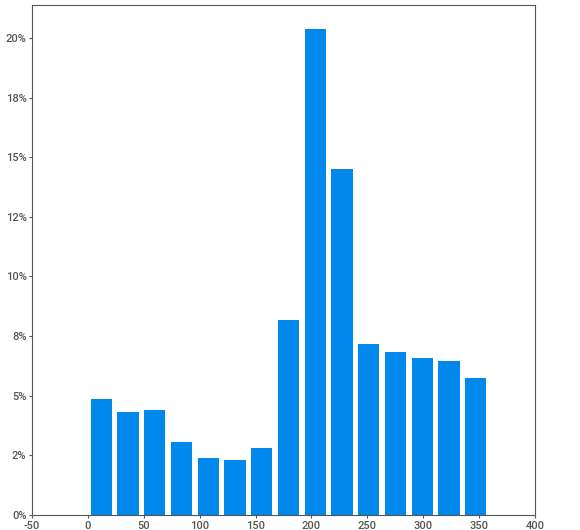
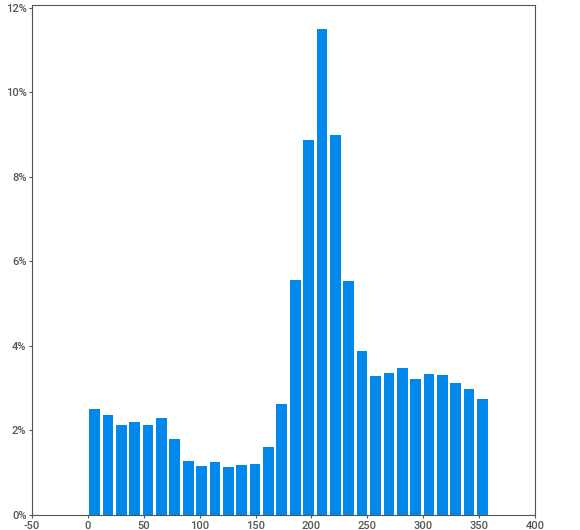
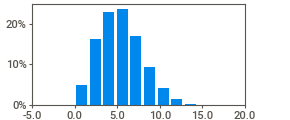
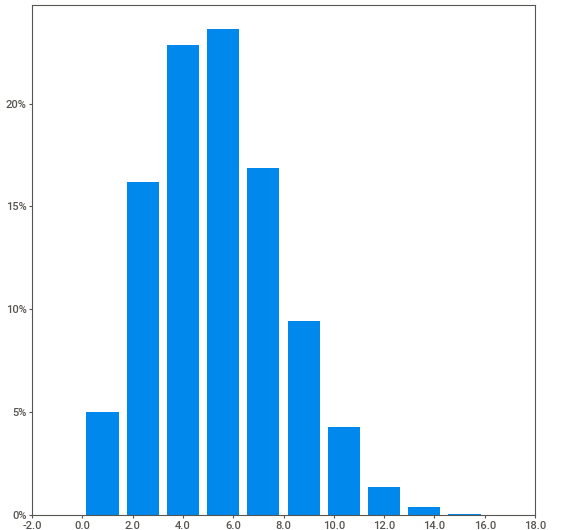
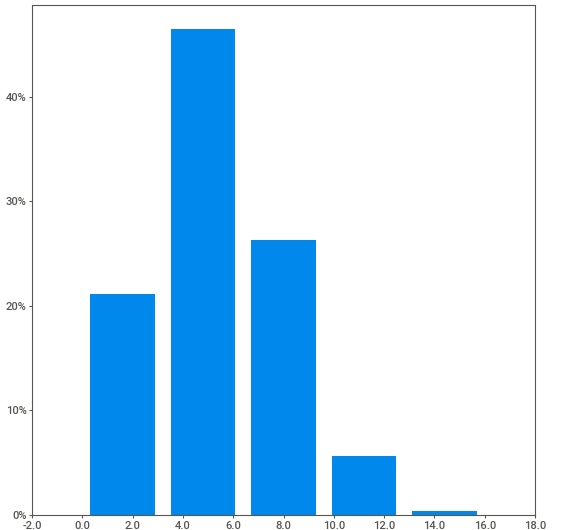
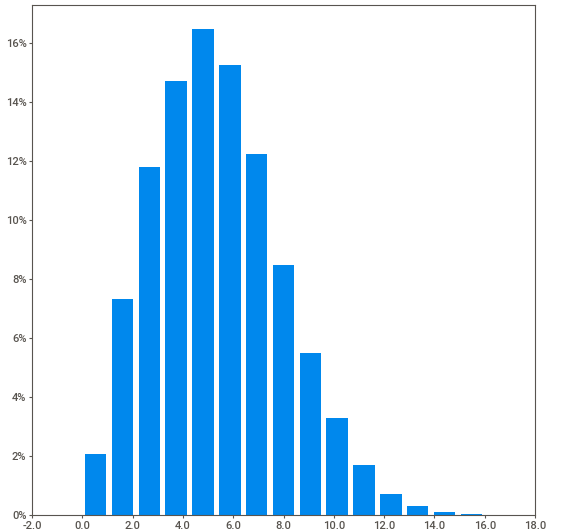
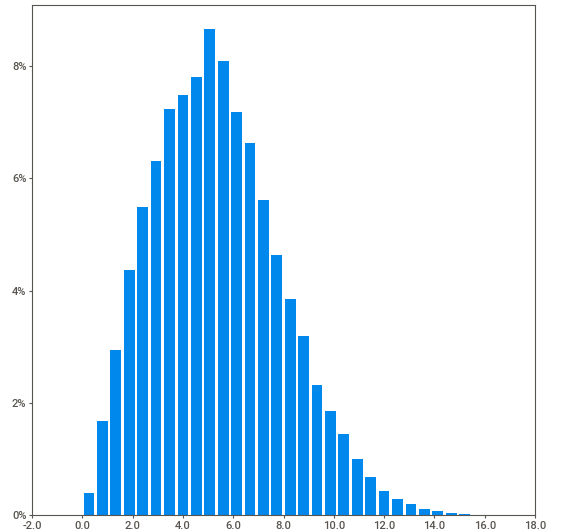
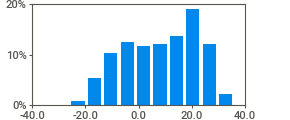
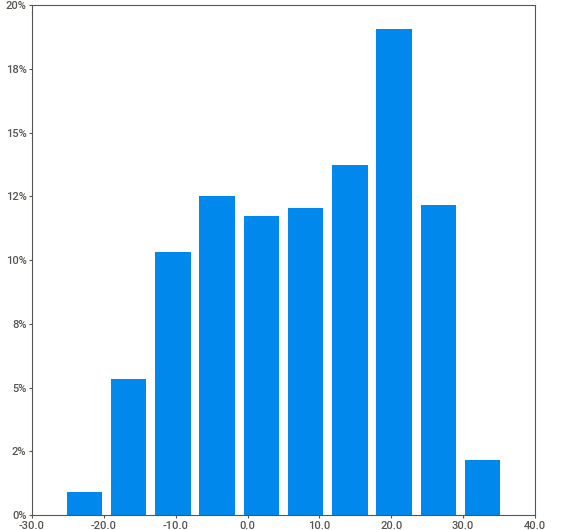
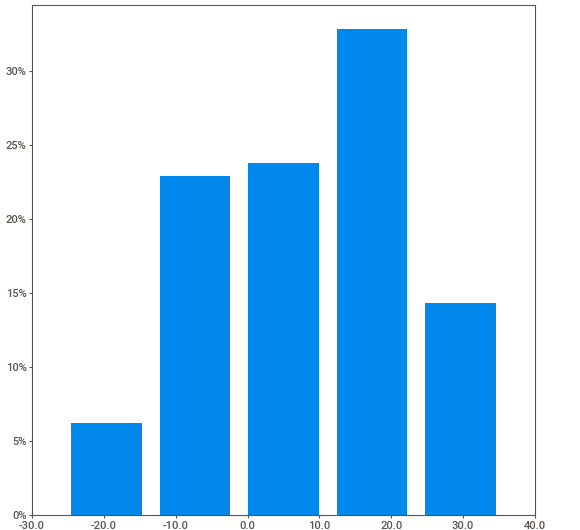
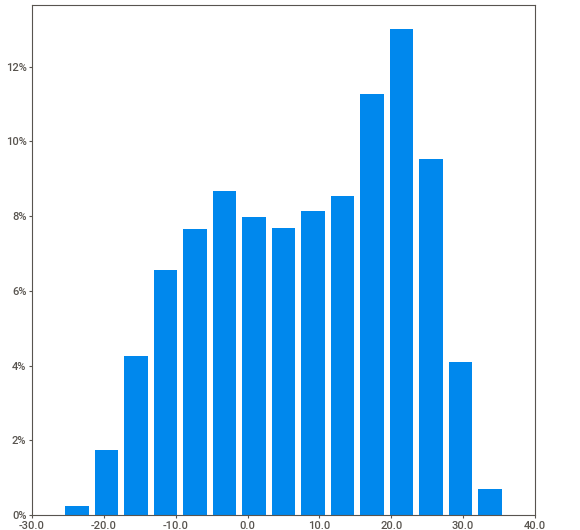
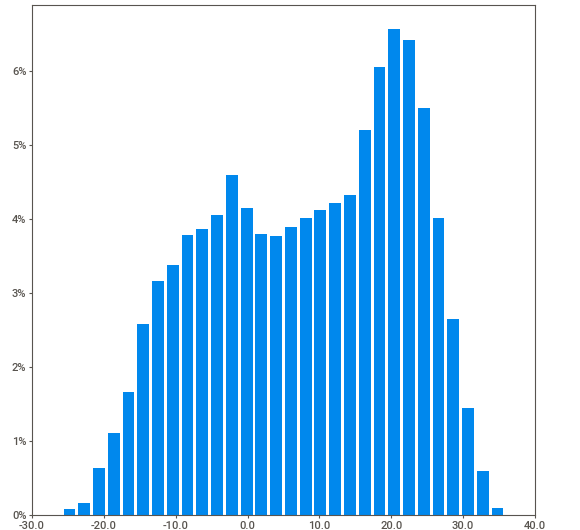
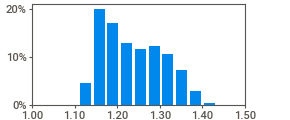
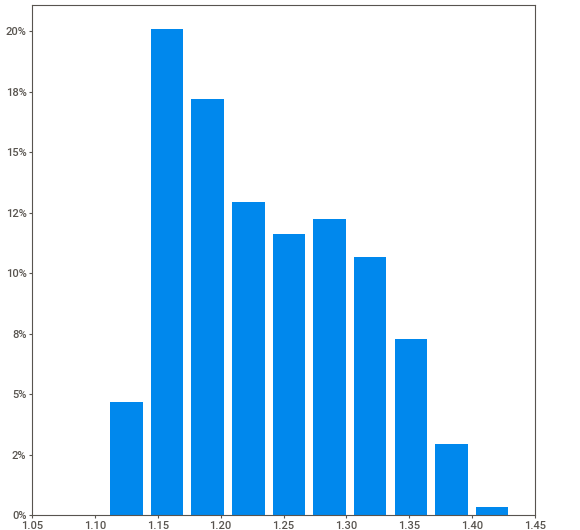
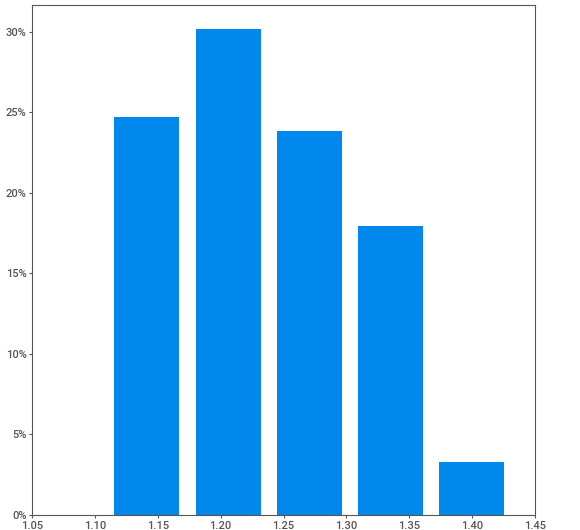
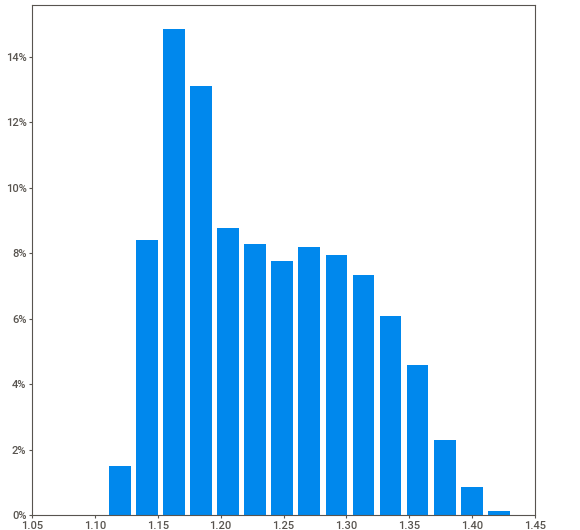
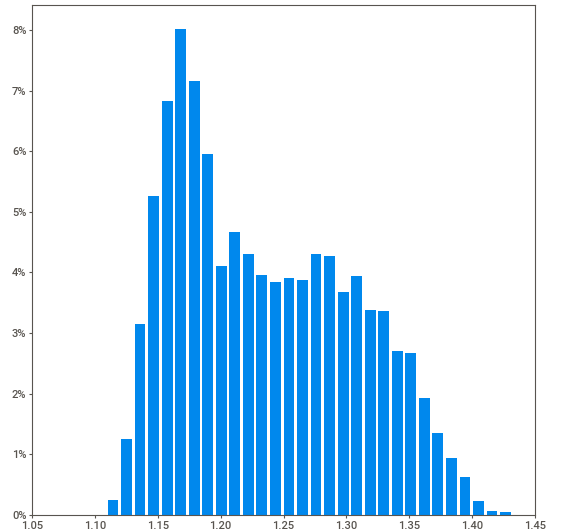
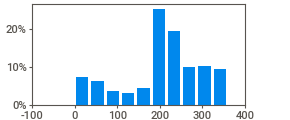
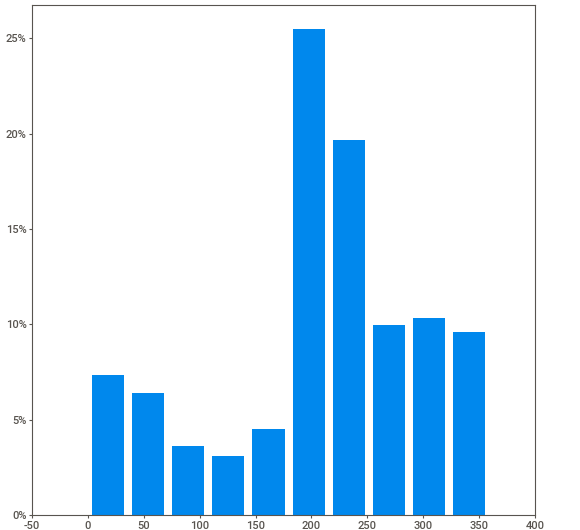
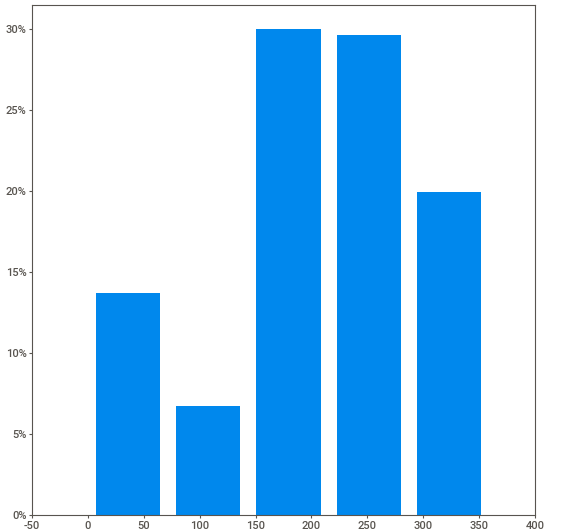
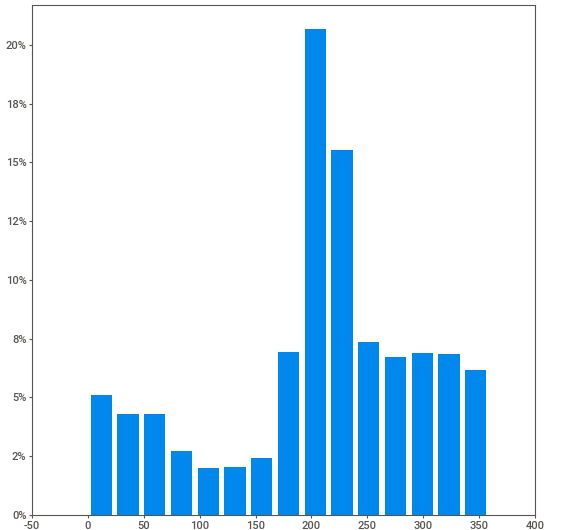
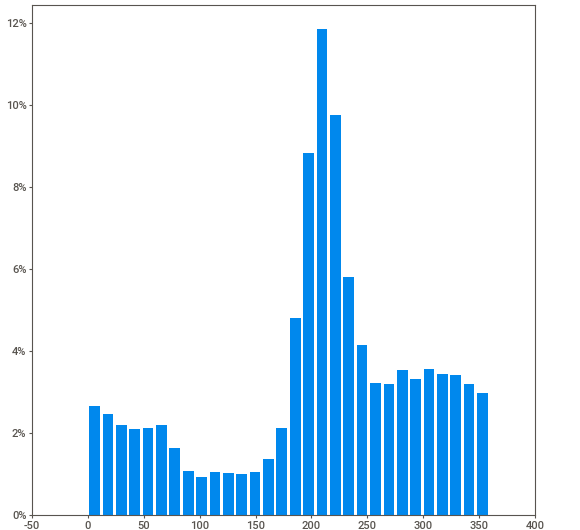
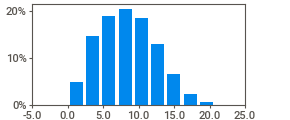
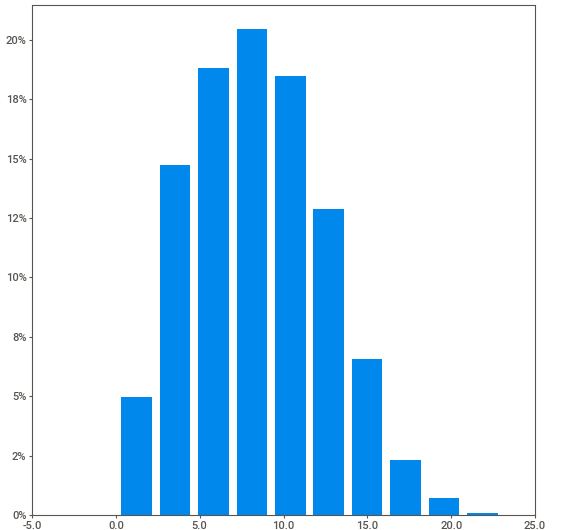
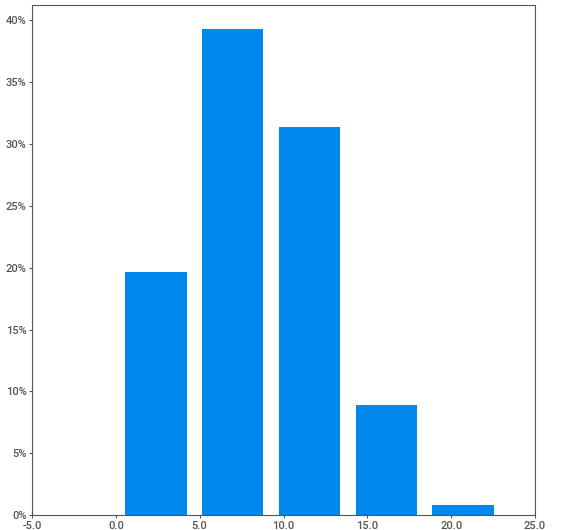
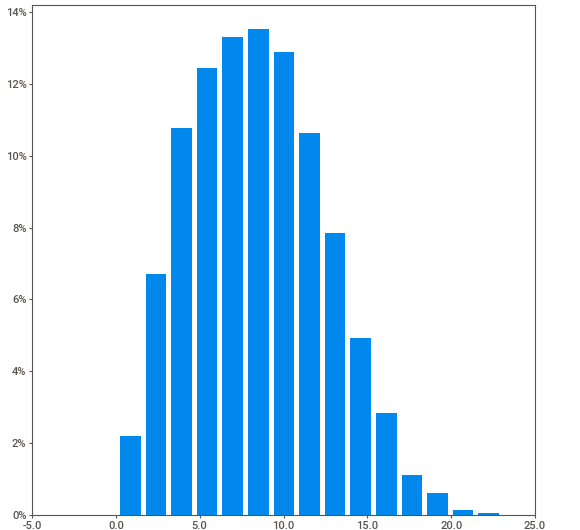
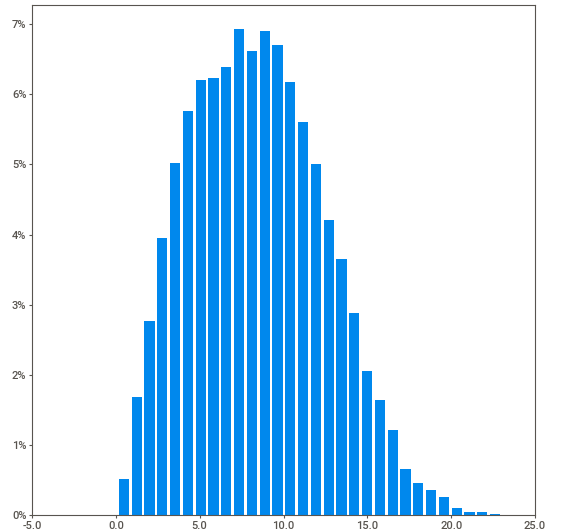
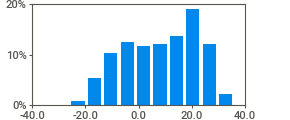
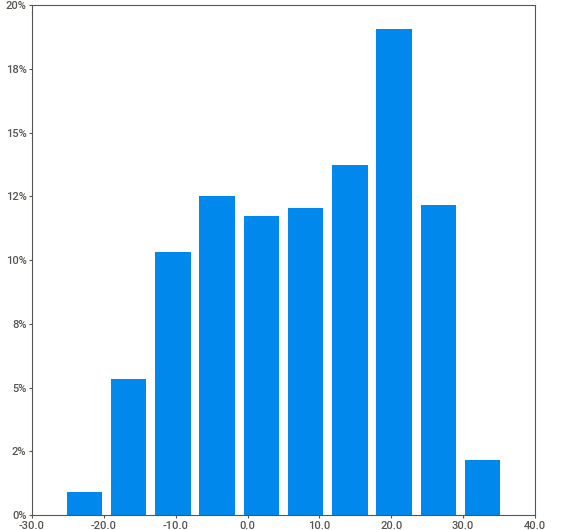
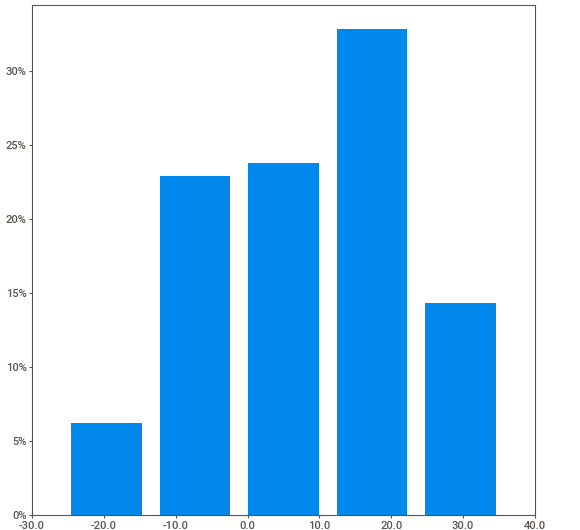
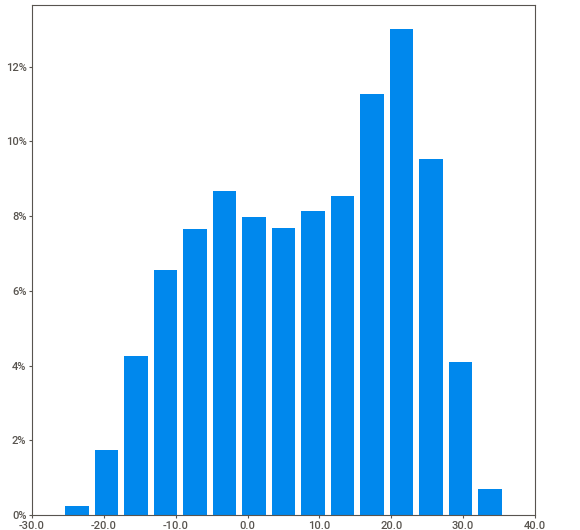
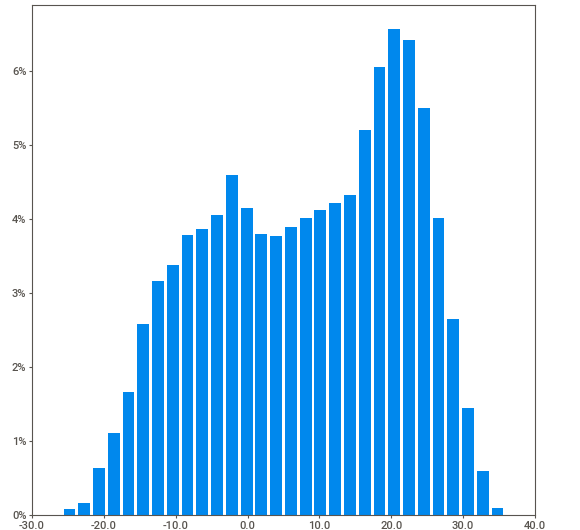
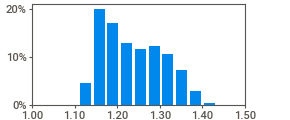
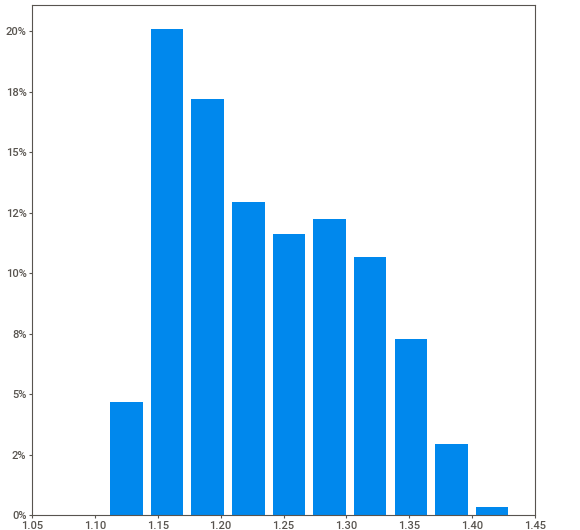
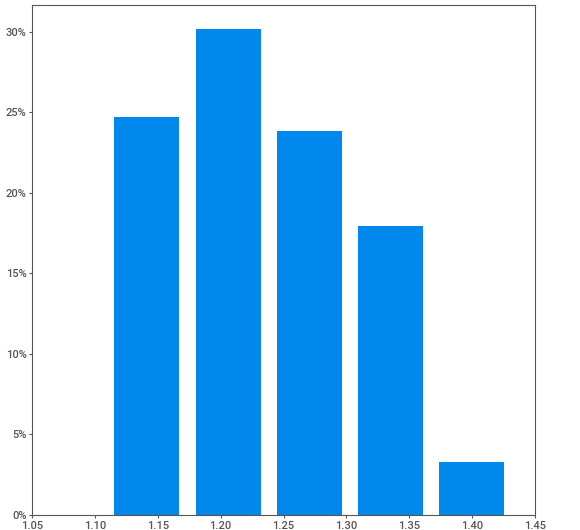
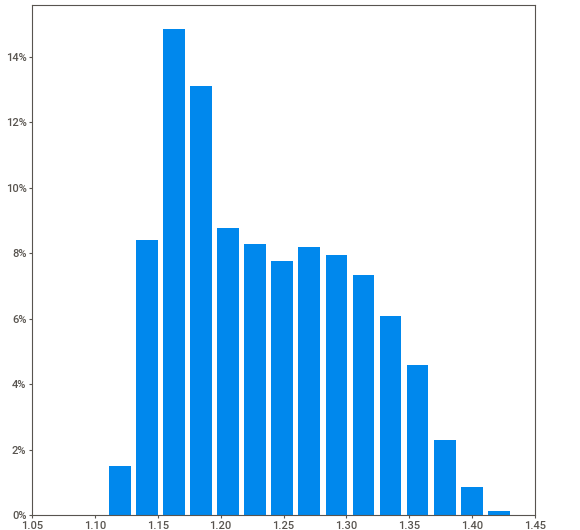
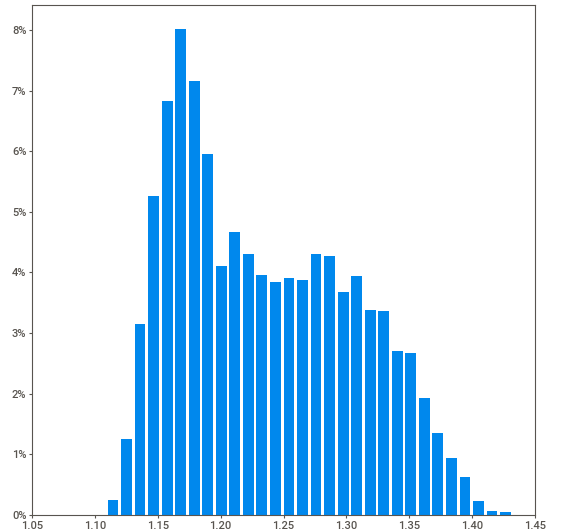
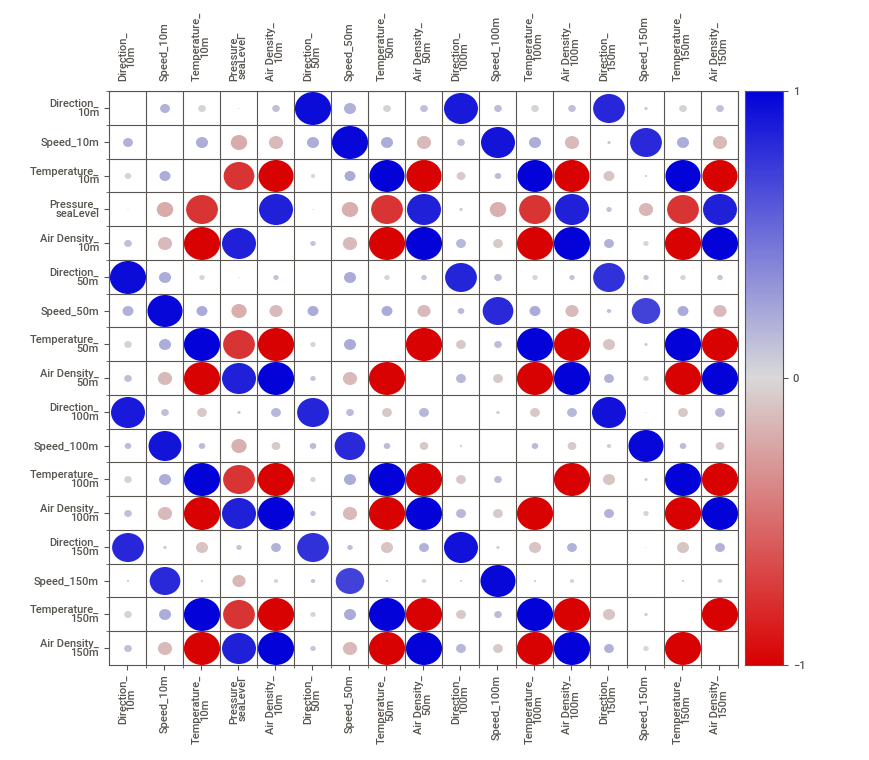
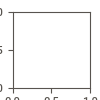

In [ ]:
feature_config = sv.FeatureConfig(skip = "Date_Time")
analyze_report = sv.analyze([df, "Train"], feat_cfg = feature_config)
analyze_report.show_notebook(w=900, h=450, scale=0.8)

In [ ]:
prof = ProfileReport(df)
prof.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## Time Series Overview

In order to remove outliers in our predictions, we will disregard any avlues that are out of the range defined by the whiskers of the box and whiskers plots:

*Upper limit: Q1 - 1.5 (Q3 - Q1)*


*Lower limit: Q3 + 1.5 (Q3 - Q1)*

In [ ]:
df_1 = df.set_index("Date_Time")

In [ ]:
# matplotlib options
import warnings
warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=1000)
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 10)

In [ ]:
speed10 = df_1["Speed_10m"].values
avg_line, low_perc, upper_perc = whiskers_lines(speed10)

-0.7599999999999998 6.6


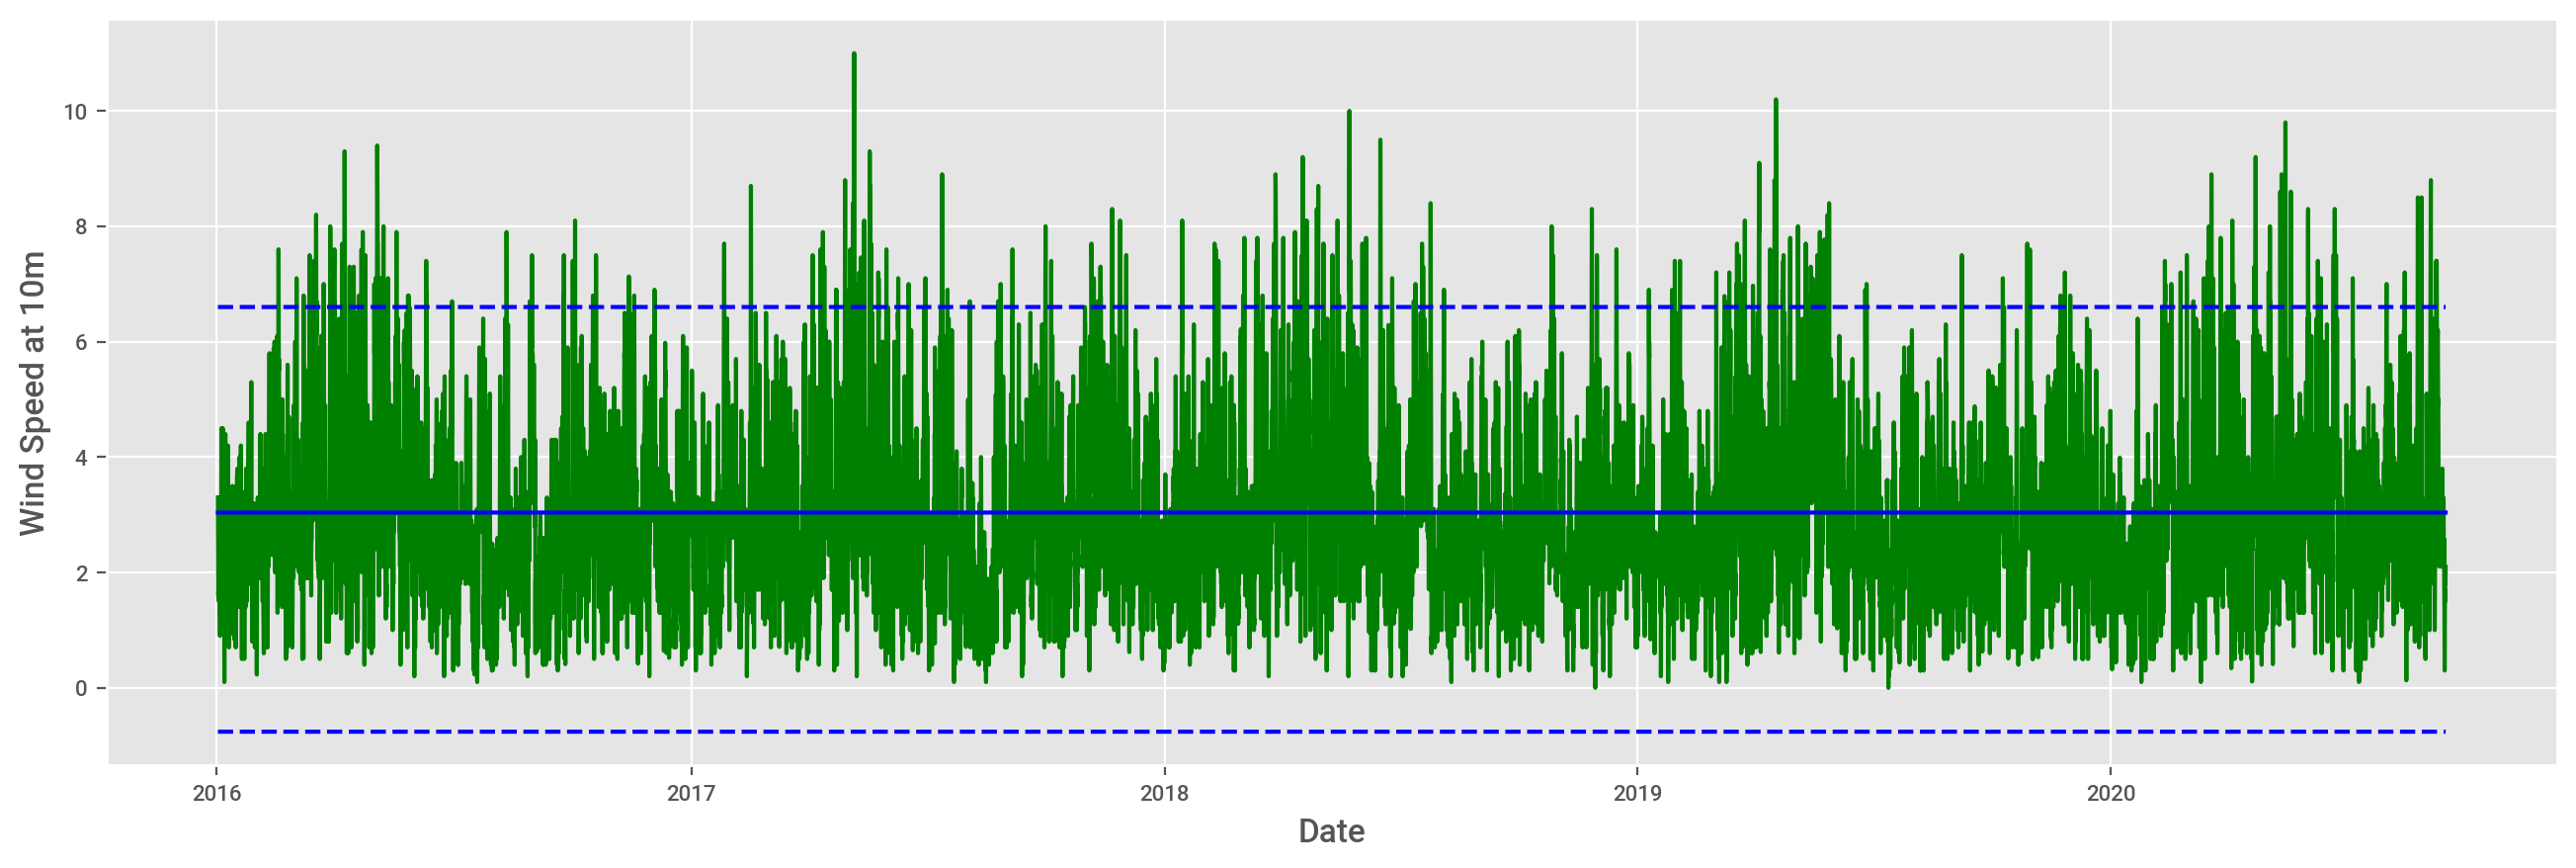

In [ ]:
plt.figure(figsize = (16, 5), dpi = 100)
plt.plot(df_1.index, df_1["Speed_10m"], "g")
plt.plot(df_1.index, avg_line, "b")
plt.plot(df_1.index, low_perc, "b--")
plt.plot(df_1.index, upper_perc, "b--")
plt.xlabel("Date")
plt.ylabel("Wind Speed at 10m")
plt.show()

In [ ]:
count = 0
for val in df_1["Speed_10m"].values:
  if val > 6.6:
    count = count + 1
count / 164094

0.02764269260302022

In [ ]:
df["month"] = df["Date_Time"].dt.month
df["year"] = df["Date_Time"].dt.year
df["year"] = df["year"].astype("string")
df["month"] = df["month"].astype("string")
df.head()

Date_Time  Direction_10m  Speed_10m  ...  Air Density_150m  month  year
0 2016-01-01 20:00:00            230       3.30  ...             1.281      1  2016
1 2016-01-01 20:15:00            231       3.23  ...             1.282      1  2016
2 2016-01-01 20:30:00            231       3.17  ...             1.282      1  2016
3 2016-01-01 20:45:00            231       3.12  ...             1.282      1  2016
4 2016-01-01 21:00:00            232       3.07  ...             1.283      1  2016

[5 rows x 20 columns]

In [ ]:
df_boxplot = df[['Date_Time', 'Speed_10m']]
df_boxplot['month'] = [d.strftime('%b') for d in df_boxplot.Date_Time]
df_boxplot.head()

Date_Time  Speed_10m month
0 2016-01-01 20:00:00       3.30   Jan
1 2016-01-01 20:15:00       3.23   Jan
2 2016-01-01 20:30:00       3.17   Jan
3 2016-01-01 20:45:00       3.12   Jan
4 2016-01-01 21:00:00       3.07   Jan

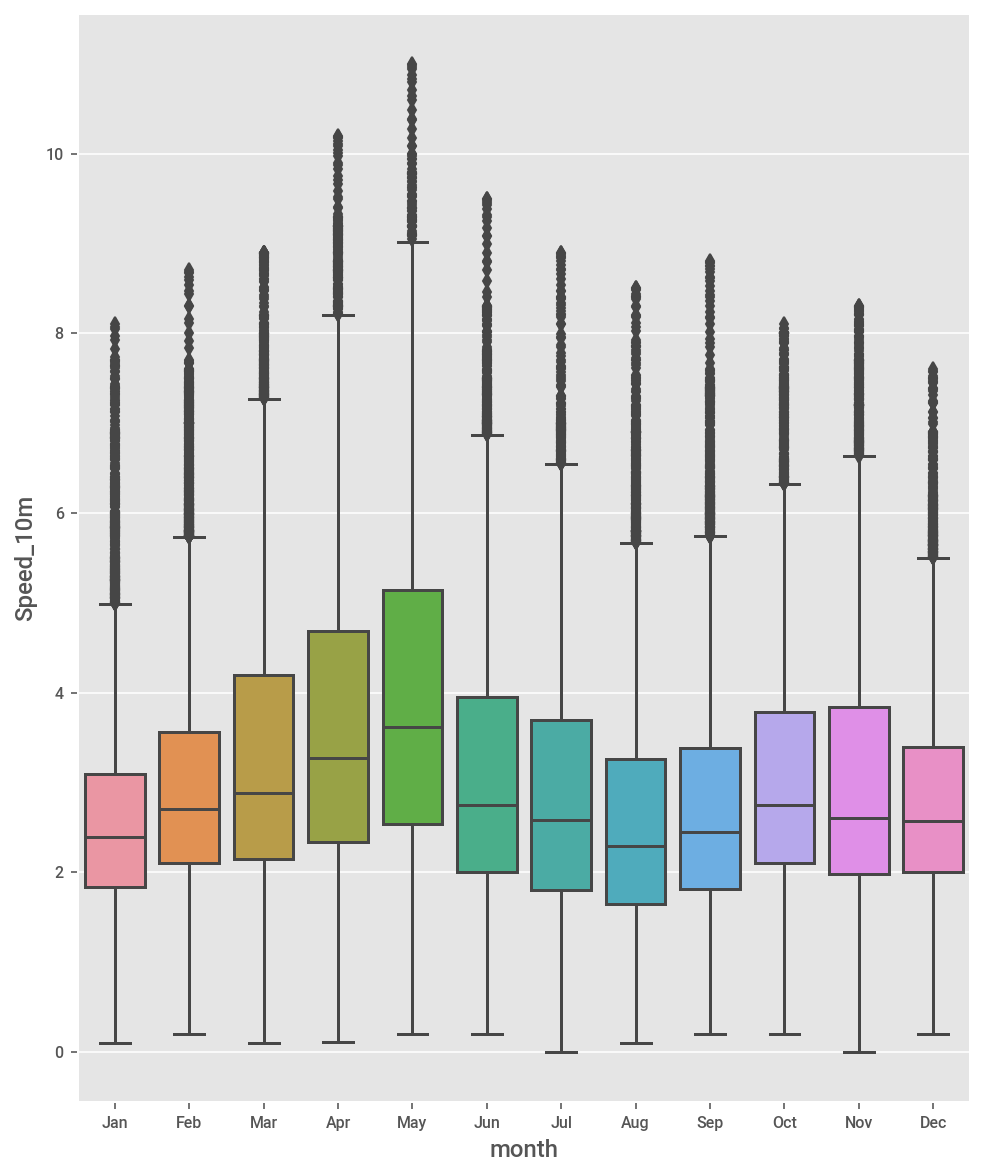

In [ ]:
sns.boxplot(x = 'month', y = 'Speed_10m', data = df_boxplot)

### Power output exploratory analysis

Importing the data containing the Park Power output:

In [ ]:
df_m = pd.read_csv("/content/drive/MyDrive/Project Deep Learning/Data/Case3/Proj_Measurements_Case3.csv")

In [ ]:
df_m.sample(5)

Date_Time  Speed_10m  ...  Direction_80m  Park Power [KW]
4492   2017-06-16 19:00:00      6.605  ...          252.9          23370.0
71616  2019-05-17 00:00:00     10.867  ...          211.5          41544.0
26861  2018-02-04 19:15:00      1.972  ...           19.4              2.0
26780  2018-02-03 23:00:00      2.851  ...           44.6           4367.0
70037  2019-04-30 13:15:00      2.289  ...          221.6              1.0

[5 rows x 10 columns]

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118382 entries, 0 to 118381
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date_Time        118382 non-null  object 
 1   Speed_10m        116866 non-null  float64
 2   Direction_10m    116866 non-null  float64
 3   Speed_30m        116866 non-null  float64
 4   Direction_30m    116866 non-null  float64
 5   Speed_50m        116866 non-null  float64
 6   Direction_50m    116866 non-null  float64
 7   Speed_80m        116866 non-null  float64
 8   Direction_80m    116866 non-null  float64
 9   Park Power [KW]  117134 non-null  float64
dtypes: float64(9), object(1)
memory usage: 9.0+ MB


In [ ]:
df_m['Date_Time'] = pd.to_datetime(df_m['Date_Time'])

In [ ]:
df_m.corr()

Speed_10m  Direction_10m  ...  Direction_80m  Park Power [KW]
Speed_10m         1.000000       0.098040  ...       0.068393         0.873531
Direction_10m     0.098040       1.000000  ...       0.886183         0.127904
Speed_30m         0.248879      -0.016776  ...      -0.015860         0.180523
Direction_30m    -0.087507      -0.047803  ...      -0.044831        -0.100503
Speed_50m         0.957167       0.144126  ...       0.113292         0.896079
Direction_50m     0.106637       0.571756  ...       0.571697         0.139206
Speed_80m         0.868438       0.113399  ...       0.085233         0.831396
Direction_80m     0.068393       0.886183  ...       1.000000         0.103644
Park Power [KW]   0.873531       0.127904  ...       0.103644         1.000000

[9 rows x 9 columns]

In [ ]:
df_2017 = df_m[(df_m['Date_Time'] > '2017-01-01') & (df_m['Date_Time'] < '2017-12-31')]
df_2018 = df_m[(df_m['Date_Time'] > '2018-01-01') & (df_m['Date_Time'] < '2018-12-31')]
df_2019 = df_m[(df_m['Date_Time'] > '2019-01-01') & (df_m['Date_Time'] < '2019-12-31')]

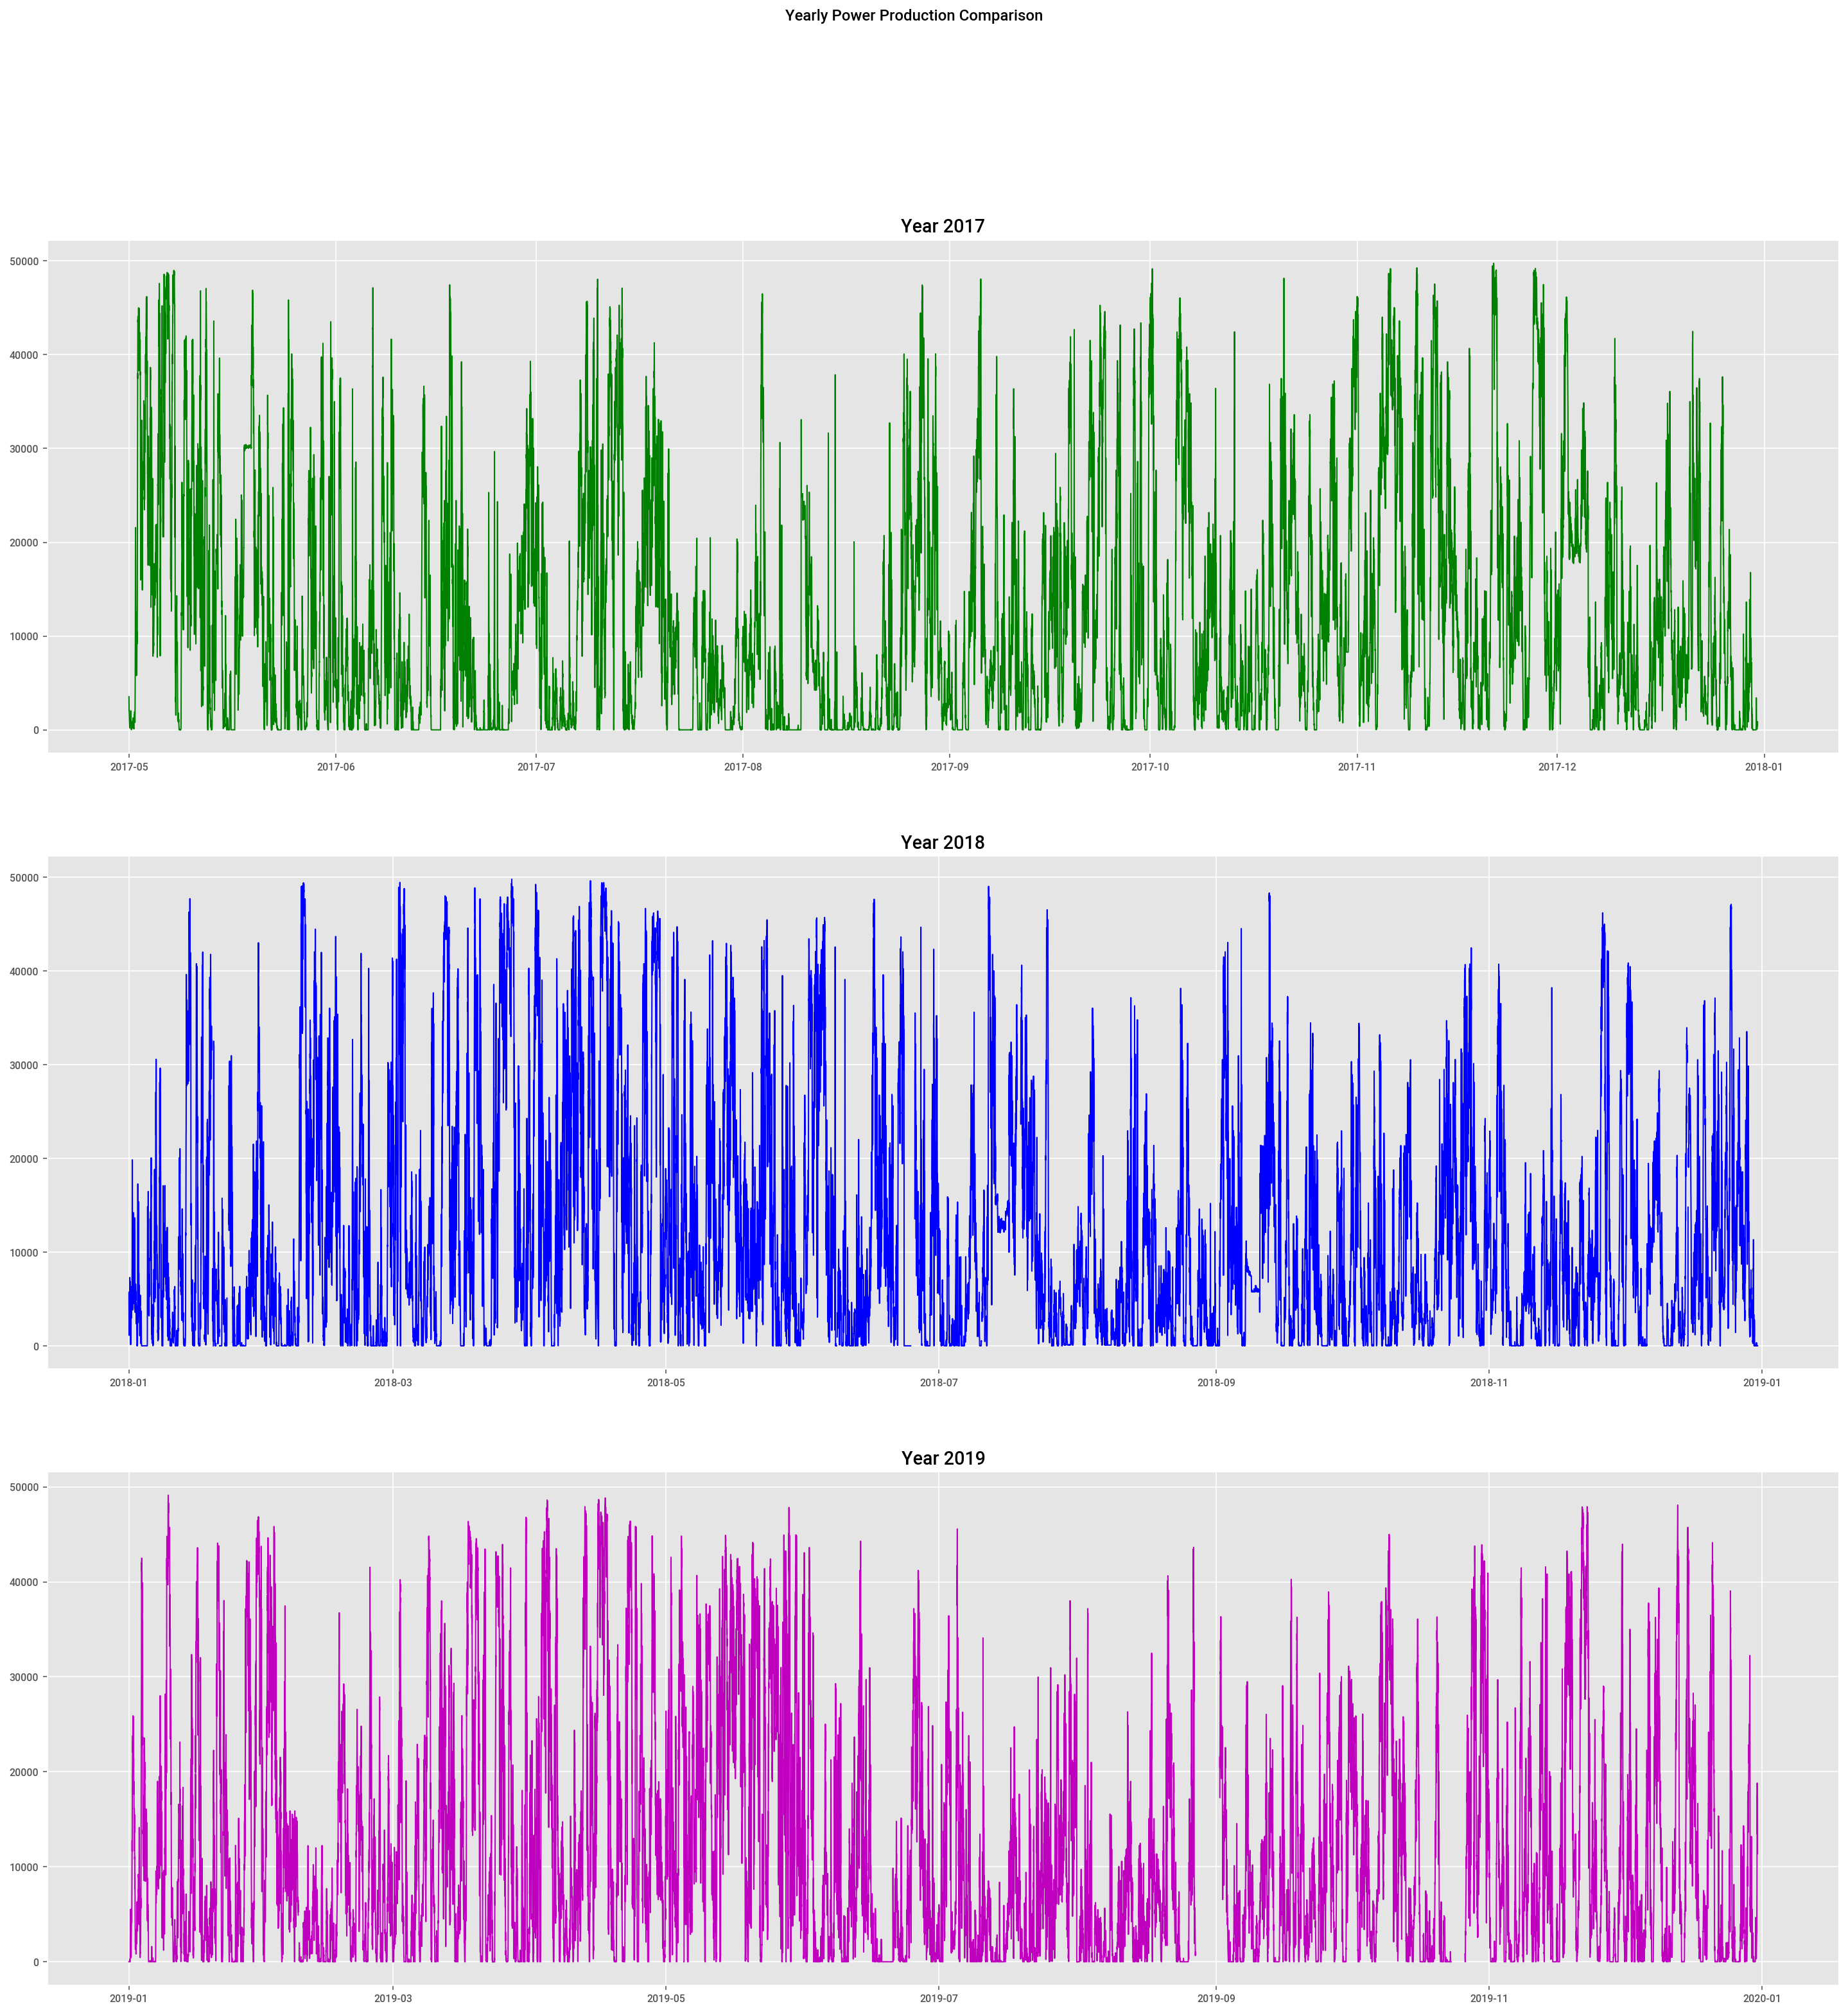

In [ ]:
fig, axs = plt.subplots(3, 1, figsize = (25,25))
fig.suptitle('Yearly Power Production Comparison')
axs[0].plot(df_2017.Date_Time, df_2017["Park Power [KW]"], lw = 1, c = "g")
axs[0].title.set_text("Year 2017")
axs[1].plot(df_2018.Date_Time, df_2018["Park Power [KW]"], lw = 1, c = "b")
axs[1].title.set_text("Year 2018")
axs[2].plot(df_2019.Date_Time, df_2019["Park Power [KW]"], lw = 1, c = "m")
axs[2].title.set_text("Year 2019")

[Text(0, 0.5, 'Park Power [KW]'), Text(0.5, 0, 'Speed 50 m')]

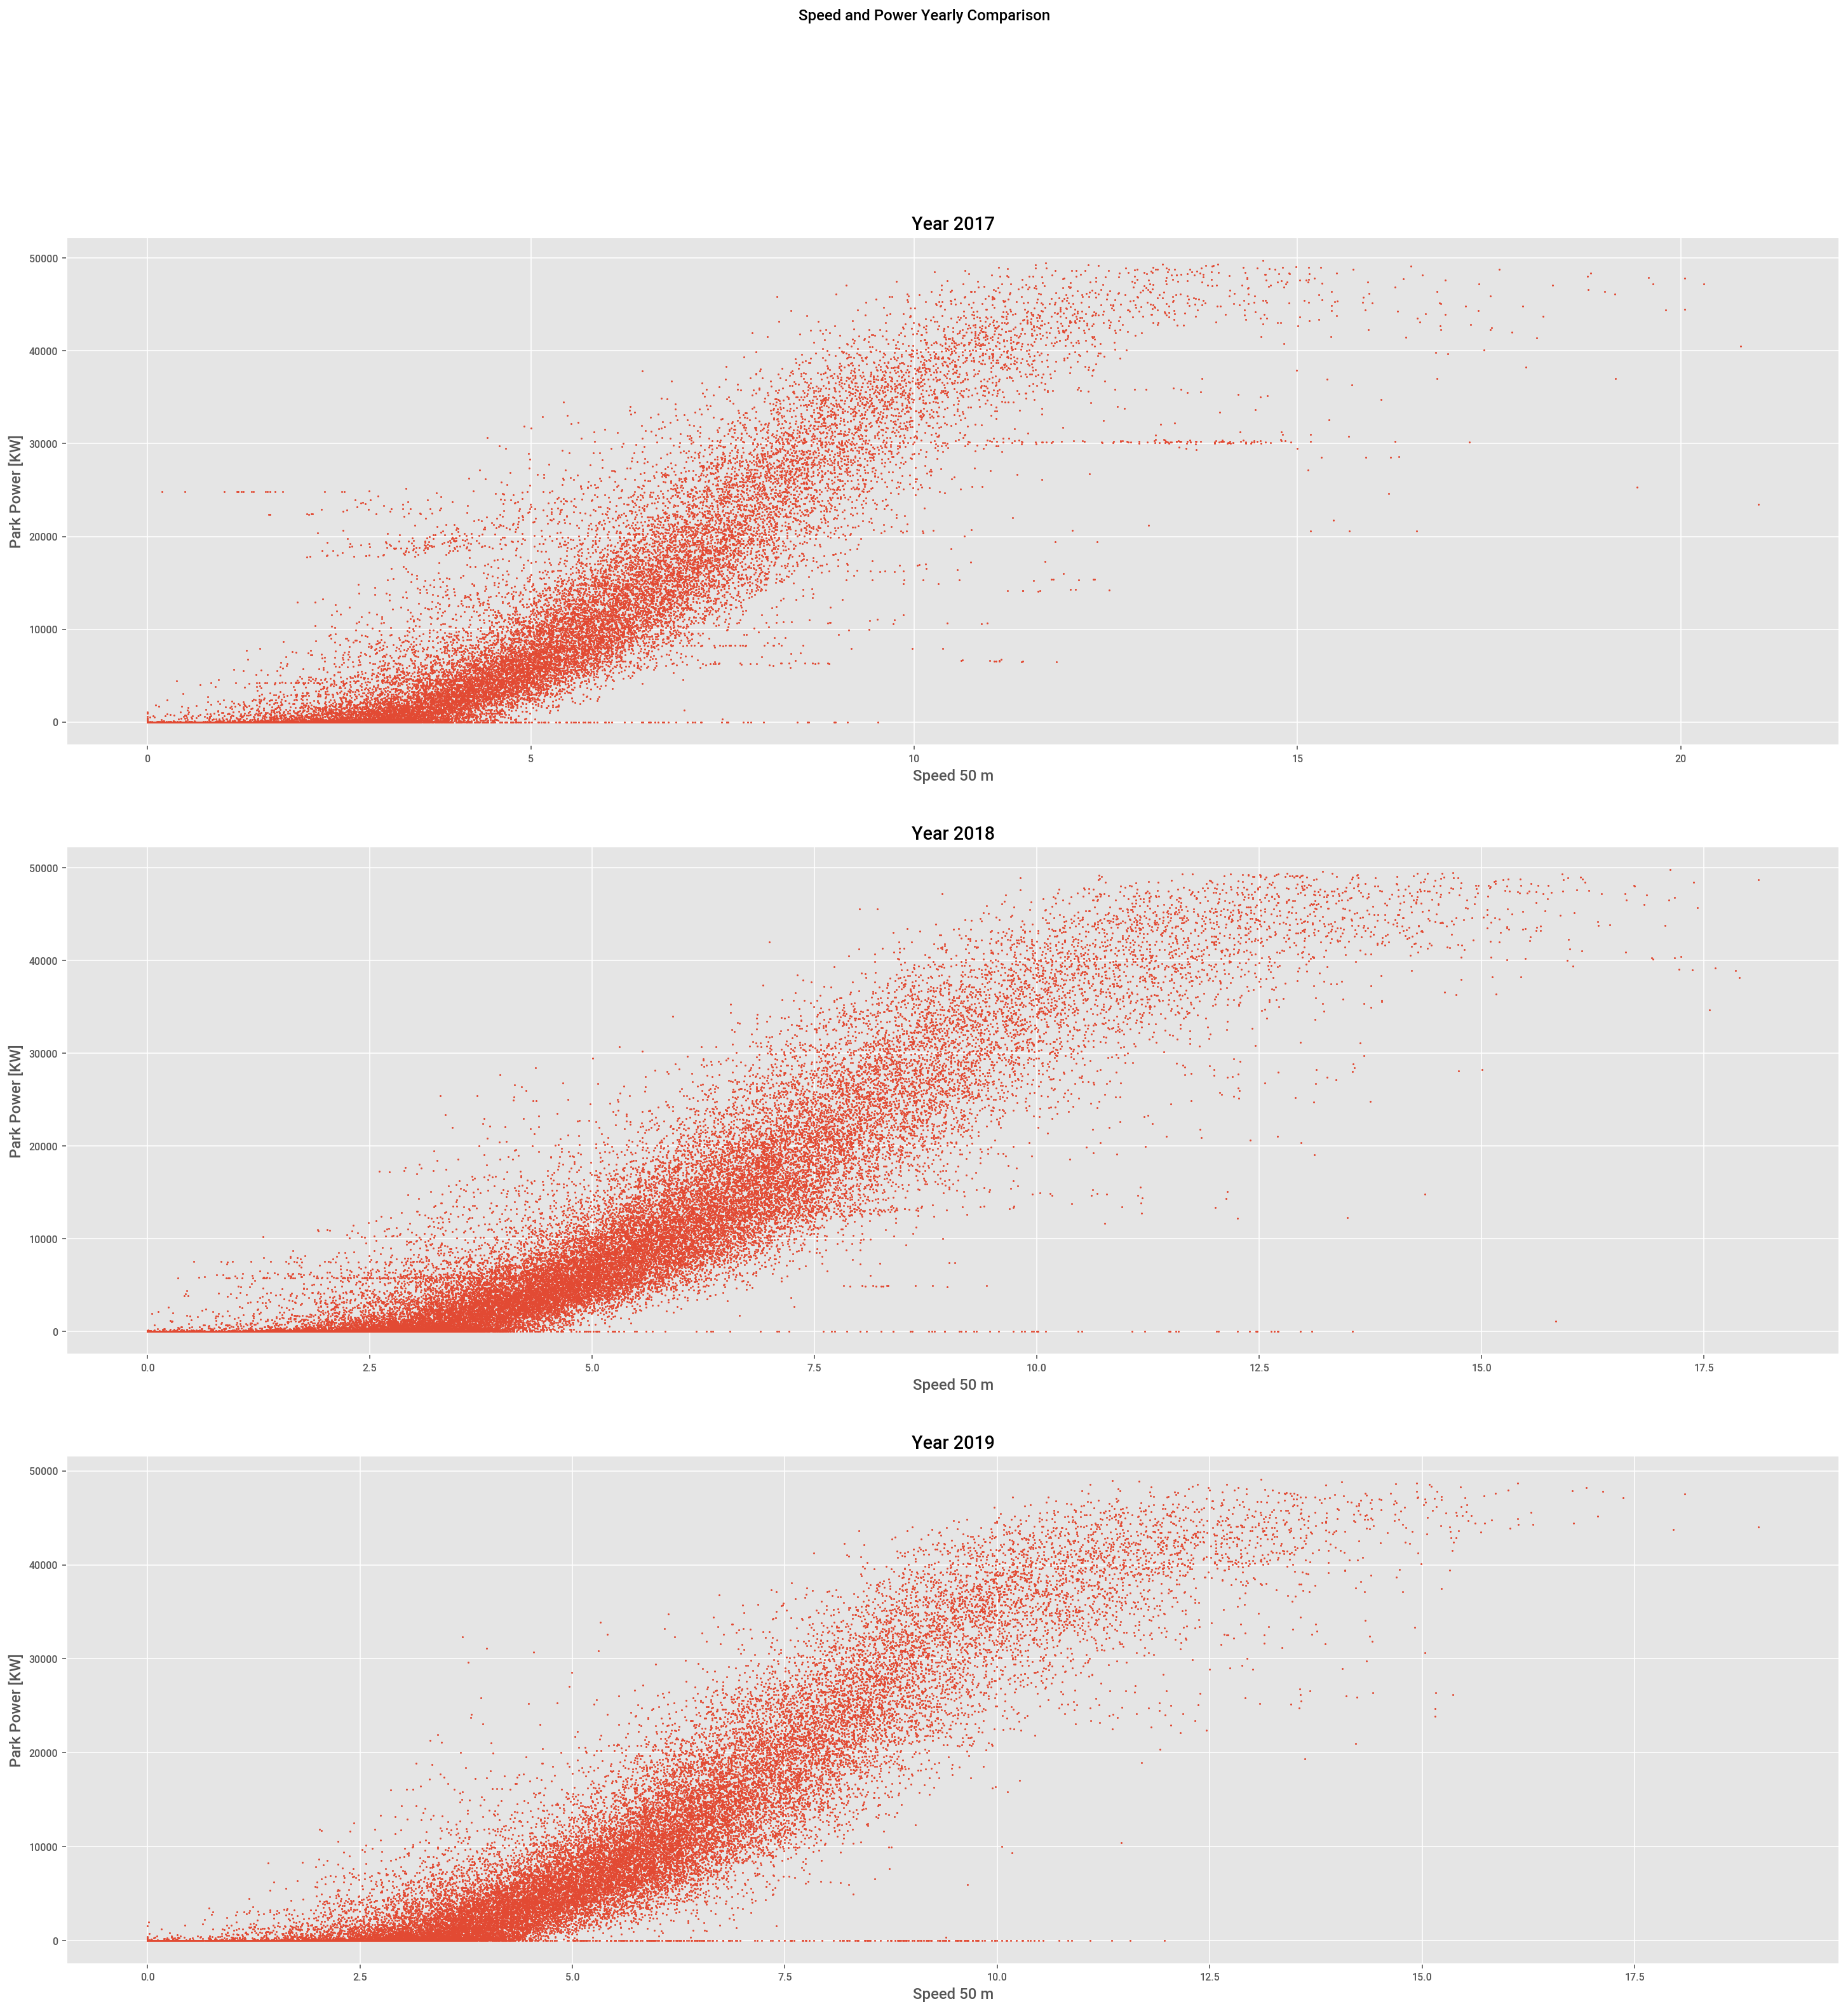

In [ ]:
fig, axs = plt.subplots(3, 1, figsize = (25,25))
fig.suptitle('Speed and Power Yearly Comparison')
axs[0].scatter(df_2017.Speed_50m, df_2017['Park Power [KW]'], s = 1)
axs[0].title.set_text("Year 2017")
axs[0].set(xlabel="Speed 50 m", ylabel="Park Power [KW]")
axs[1].scatter(df_2018.Speed_50m, df_2018['Park Power [KW]'], s = 1)
axs[1].title.set_text("Year 2018")
axs[1].set(xlabel="Speed 50 m", ylabel="Park Power [KW]")
axs[2].scatter(df_2019.Speed_50m, df_2019['Park Power [KW]'], s = 1)
axs[2].title.set_text("Year 2019")
axs[2].set(xlabel="Speed 50 m", ylabel="Park Power [KW]")

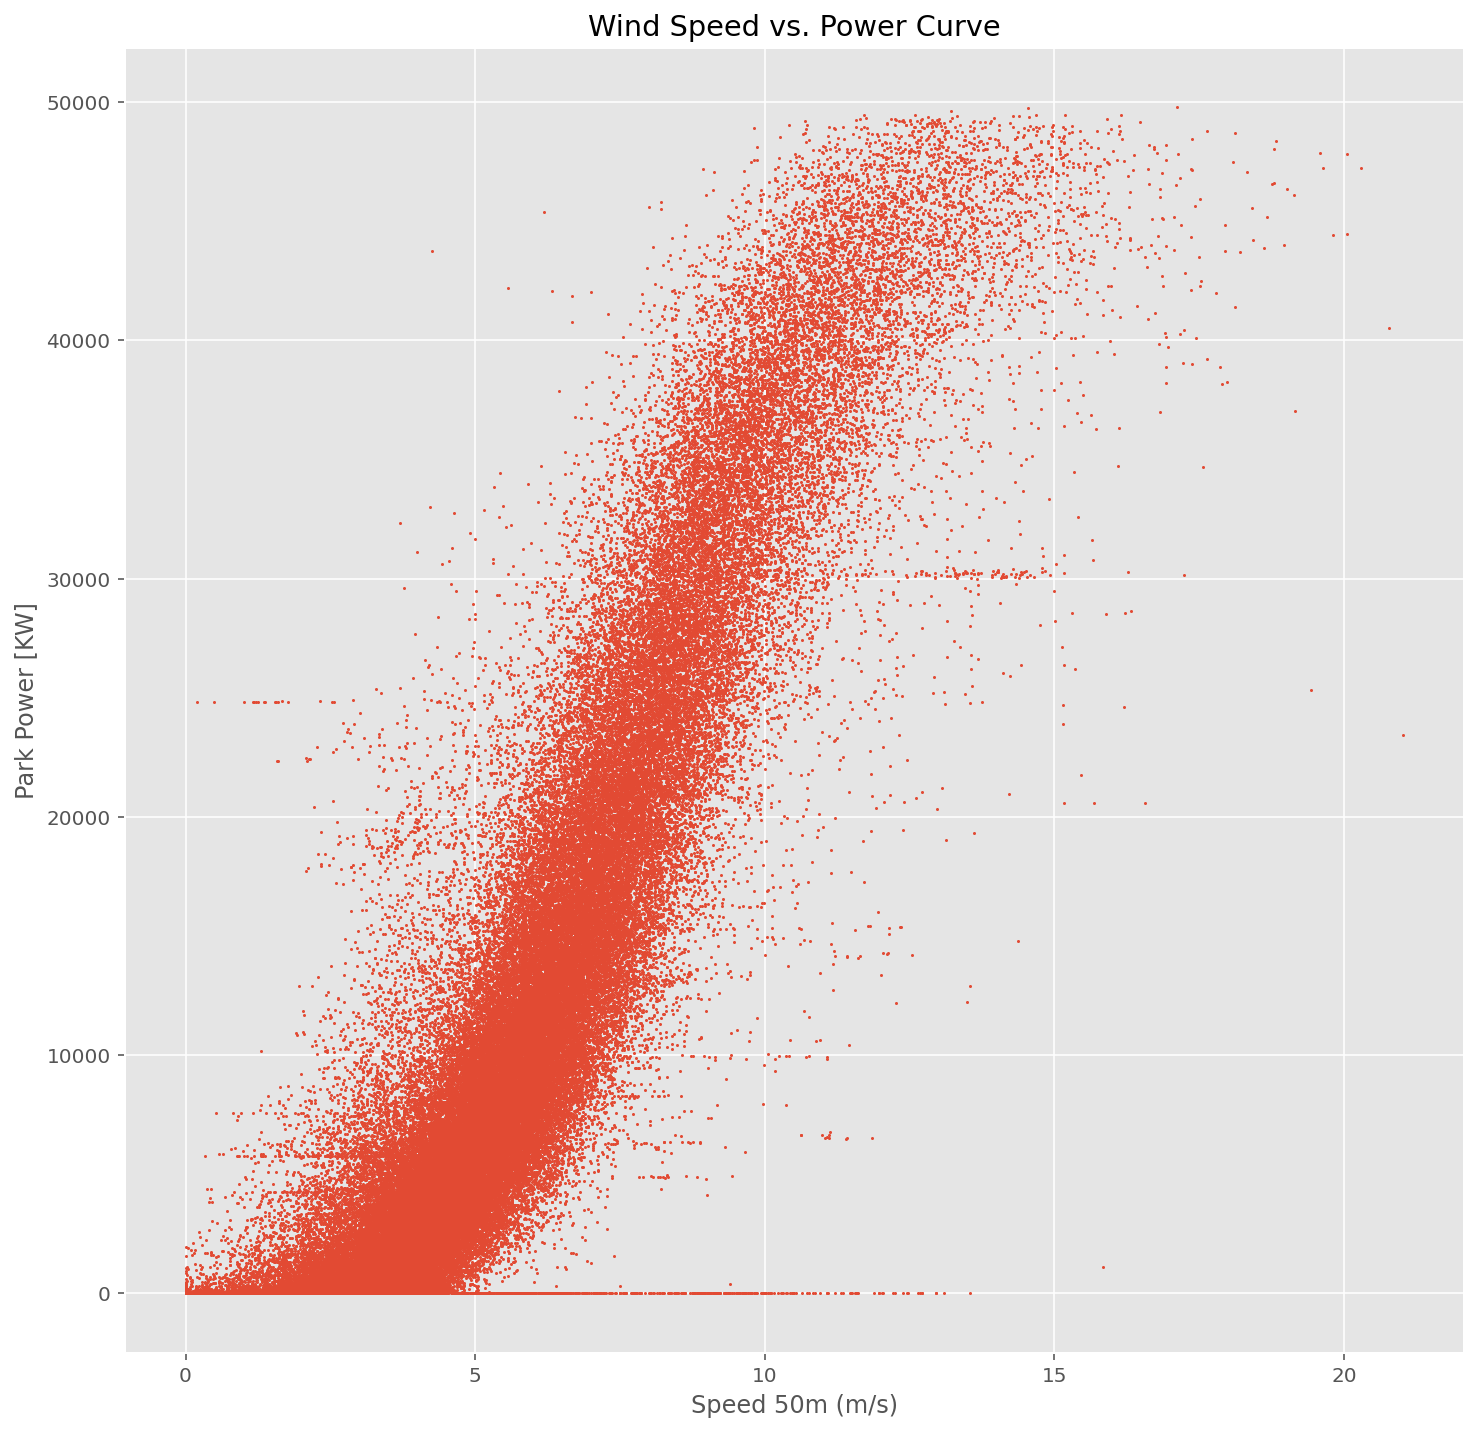

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.scatter(df_m.Speed_50m, df_m['Park Power [KW]'], s = 1)
plt.title('Wind Speed vs. Power Curve')
plt.xlabel("Speed 50m (m/s)")
plt.ylabel("Park Power [KW]")
plt.show()

## Tensorflow statistics

In [ ]:
import tensorflow as tf
import tempfile, urllib, zipfile
!pip install tensorflow_data_validation
import tensorflow_data_validation as tfdv
from tensorflow.python.lib.io import file_io
from tensorflow_data_validation.utils import slicing_util
from tensorflow_metadata.proto.v0.statistics_pb2 import DatasetFeatureStatisticsList, DatasetFeatureStatistics


UnknownExtra: ignored

It is always important to visualize standard statistics and visualize the distributions of the data to have a better understanding. Now we are going to use the Tensorflow library to identify patterns in our data and visualize the intrinsic statistical distributions of the data .

In [ ]:
splits = [0.7, 0.1, 0.2]
train_df, eval_df, test_df = np.split(df.sample(frac=1, random_state=42),
    [int(.7*len(df)), int(.85*len(df))])

In [ ]:
# Find the amount of records in each dataset:
print('Training dataset has {} records\nValidation dataset has {} records\nServing dataset has {} records'.format(len(train_df),len(eval_df),len(test_df)))

Training dataset has 114865 records
Validation dataset has 24614 records
Serving dataset has 24615 records


In [ ]:
train_df.columns

Index(['Date_Time', 'Direction_10m', 'Speed_10m', 'Temperature_10m',
       'Pressure_seaLevel', 'Air Density_10m', 'Direction_50m', 'Speed_50m',
       'Temperature_50m', 'Air Density_50m', 'Direction_100m', 'Speed_100m',
       'Temperature_100m', 'Air Density_100m', 'Direction_150m', 'Speed_150m',
       'Temperature_150m', 'Air Density_150m', 'month', 'year'],
      dtype='object')

In [ ]:
features_stat = ['Direction_10m', 'Speed_10m', 'Temperature_10m',
       'Pressure_seaLevel', 'Air Density_10m', 'Direction_50m', 'Speed_50m',
       'Temperature_50m', 'Air Density_50m', 'Direction_100m', 'Speed_100m',
       'Temperature_100m', 'Air Density_100m', 'Direction_150m', 'Speed_150m',
       'Temperature_150m', 'Air Density_150m', 'month', 'year']

In [ ]:
stats_options = tfdv.StatsOptions(feature_allowlist = features_stat)
stats_options.feature_allowlist

In [ ]:
train_stats = tfdv.generate_statistics_from_dataframe(train_df, stats_options)
tfdv.visualize_statistics(train_stats)

In [ ]:
train_df = train_df.drop("Temperature_150m", axis = 1)

In [ ]:
train_plot = train_df.drop("Date_Time", axis = 1)

In [ ]:
df = df.set_index("Date_Time")
df.head()

## Wind Rose Representation

Inspiration came from [Hatari Labs' post](https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial)

In [ ]:
df.head()

Date_Time  Direction_10m  Speed_10m  ...  Air Density_150m  month  year
0 2016-01-01 20:00:00            230       3.30  ...             1.281      1  2016
1 2016-01-01 20:15:00            231       3.23  ...             1.282      1  2016
2 2016-01-01 20:30:00            231       3.17  ...             1.282      1  2016
3 2016-01-01 20:45:00            231       3.12  ...             1.282      1  2016
4 2016-01-01 21:00:00            232       3.07  ...             1.283      1  2016

[5 rows x 20 columns]

### Feature expansion

Would it be interesting to use the wind speed from now on as divided into x and y? This feature expansion can, through the NN unveil correlations hidden with the value of the angular degrees.

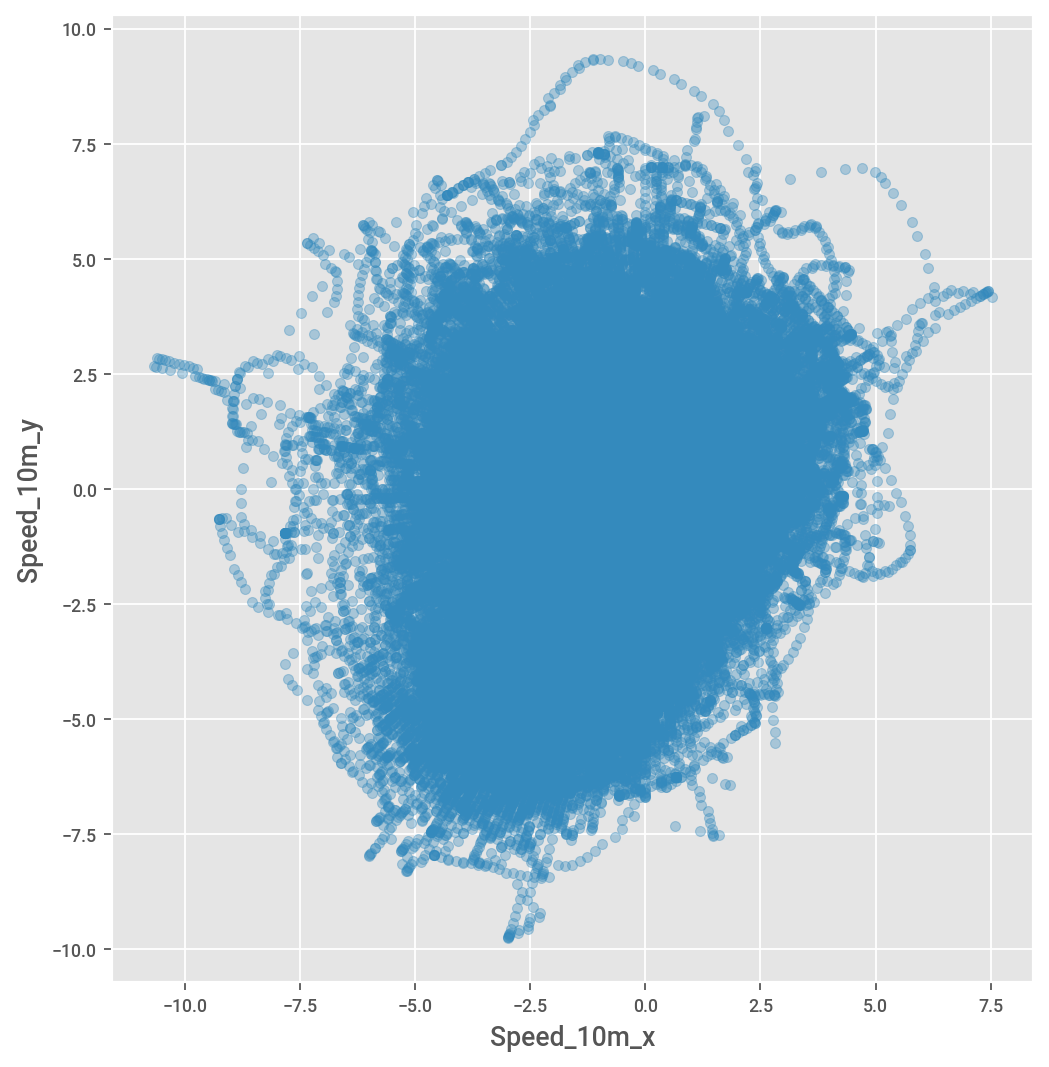

In [ ]:
df['Speed_10m_x'] = df['Speed_10m'] * np.sin(df['Direction_10m'] * pi / 180.0)
df['Speed_10m_y'] = df['Speed_10m'] * np.cos(df['Direction_10m'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df.plot(kind='scatter', x='Speed_10m_x', y='Speed_10m_y', alpha=0.35, ax=ax)

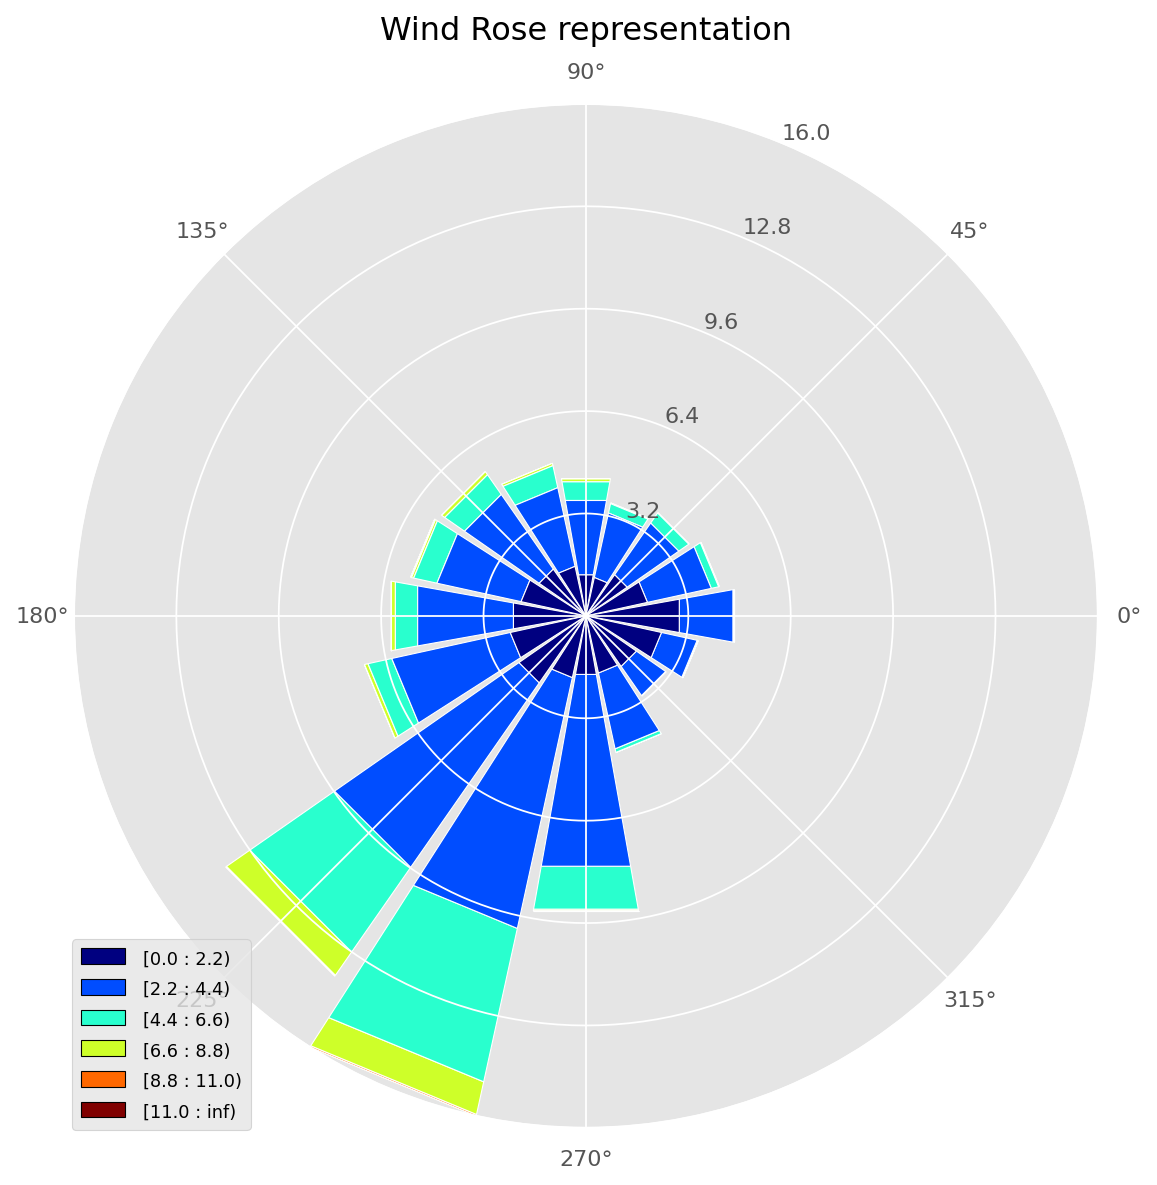

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(df.Direction_10m, df.Speed_10m, normed=True, opening=0.9, edgecolor='white')
ax.set_title("Wind Rose representation")
ax.set_legend()

## Rolling average plot

It is interesting to see how the each value compares with the hourly rolling average and see whether it could be an interesting rolling window.

In [ ]:
df.head()

Date_Time  Direction_10m  Speed_10m  ...  year  Speed_10m_x  Speed_10m_y
0 2016-01-01 20:00:00            230       3.30  ...  2016    -2.527947    -2.121199
1 2016-01-01 20:15:00            231       3.23  ...  2016    -2.510181    -2.032705
2 2016-01-01 20:30:00            231       3.17  ...  2016    -2.463553    -1.994946
3 2016-01-01 20:45:00            231       3.12  ...  2016    -2.424695    -1.963480
4 2016-01-01 21:00:00            232       3.07  ...  2016    -2.419193    -1.890081

[5 rows x 22 columns]

In [ ]:
data_columns = ['Direction_10m', 'Speed_10m', 'Temperature_10m', 'Pressure_seaLevel',
                 'Air Density_10m', 'Direction_50m', 'Speed_50m', 'Temperature_50m',
                 'Air Density_50m', 'Direction_100m', 'Speed_100m', 'Temperature_100m',
                 'Air Density_100m', 'Direction_150m', 'Speed_150m', 'Temperature_150m',
                 'Air Density_150m']

df_hourly = df[data_columns].rolling(4).mean()
df_hourly.head()

Direction_10m  Speed_10m  ...  Temperature_150m  Air Density_150m
0            NaN        NaN  ...               NaN               NaN
1            NaN        NaN  ...               NaN               NaN
2            NaN        NaN  ...               NaN               NaN
3         230.75     3.2050  ...            -1.840           1.28175
4         231.25     3.1475  ...            -1.925           1.28225

[5 rows x 17 columns]

NameError: ignored

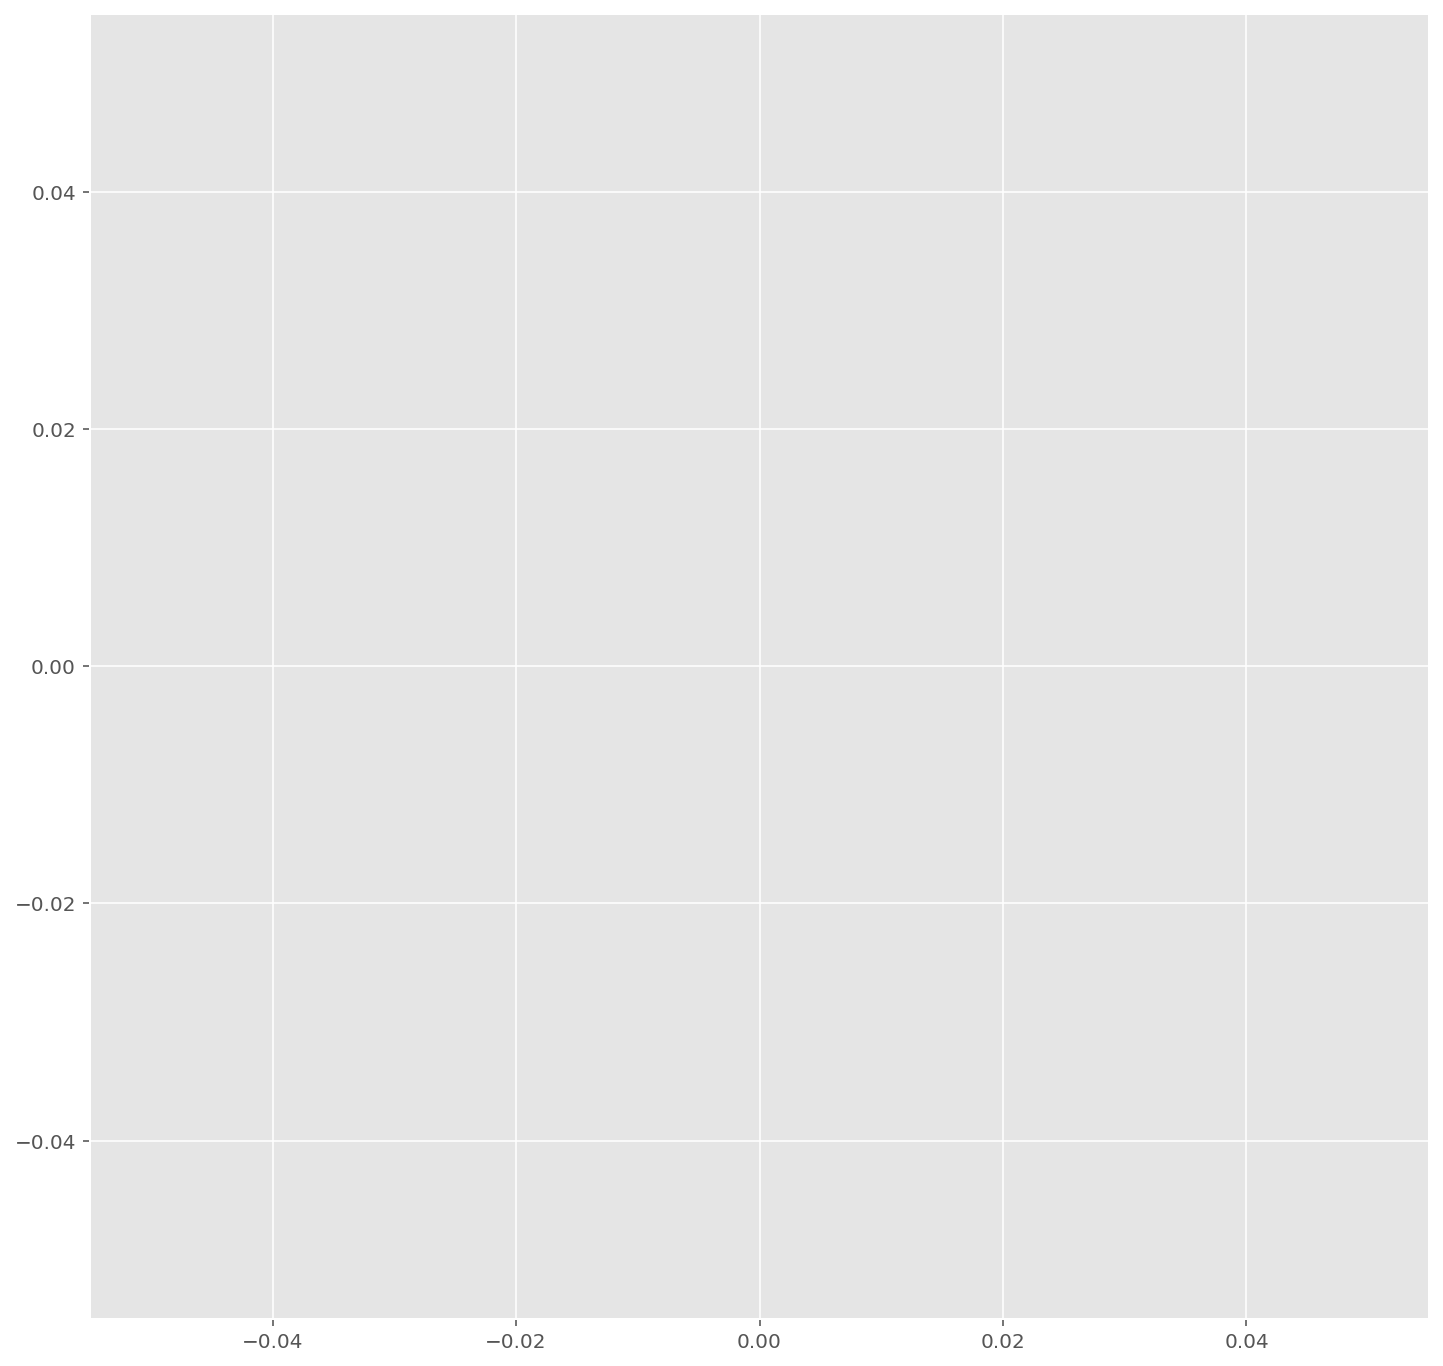

In [ ]:
# Start and end of the date range to extract
start, end = '2017-01-01', '2017-01-01'
# Plot 15min and hourly moving average time series together
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Speed_10m'],
marker='.', linestyle='-', linewidth=0.5, label='15 mins')
ax.plot(df_hourly.loc[start:end, 'Speed_10m'],
marker='.', linestyle='-', label='1-h Moving Average', color="grey")
ax.set_ylabel('Wind Speed')
ax.legend();

## Autocorrelation Plots

Useful to determine how long can the looking back windoes be defined.

[Interpreting Autocorrelation](https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14)

[Interpreting Partial Autocorrelation](https://timeseriesreasoning.com/contents/partial-auto-correlation/)

[Both](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

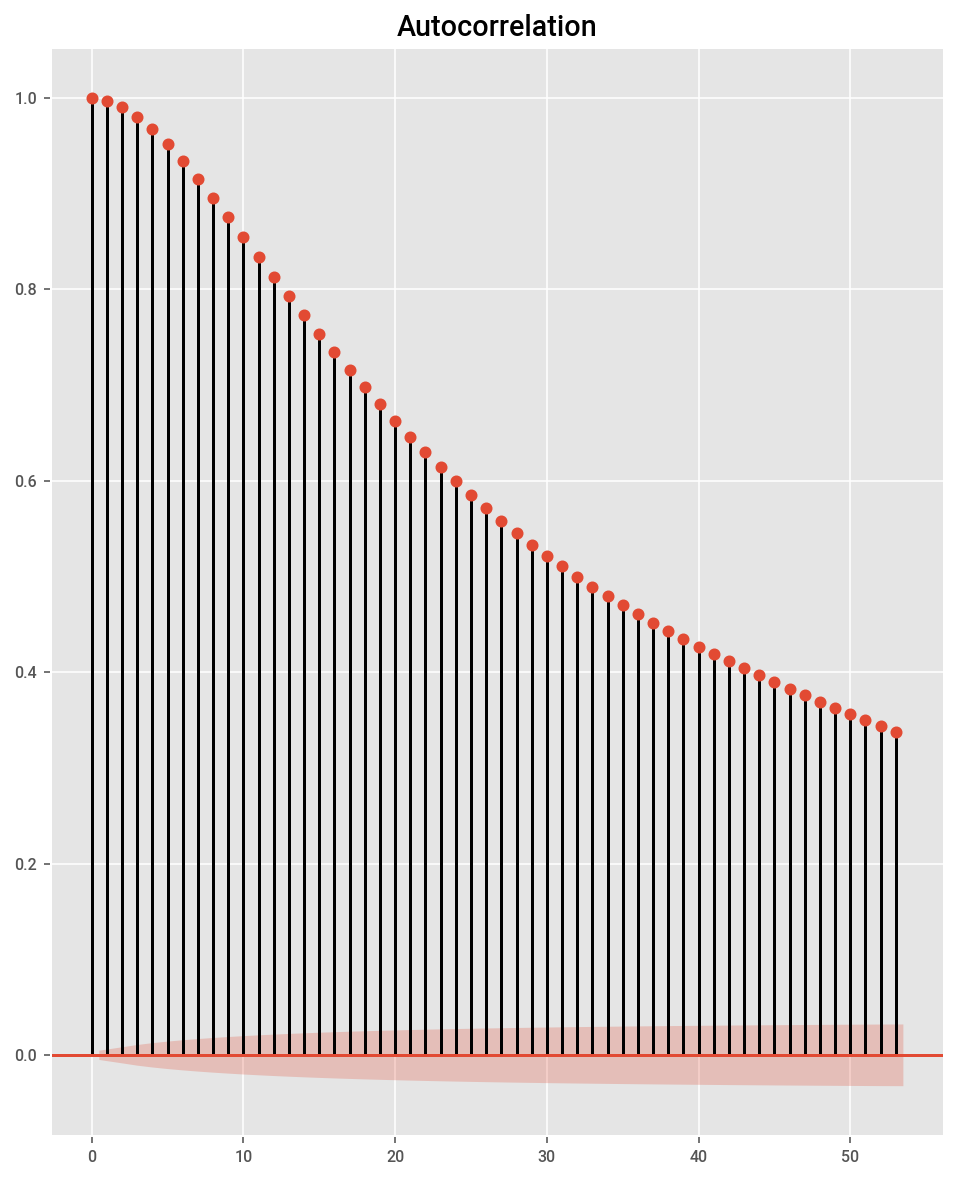

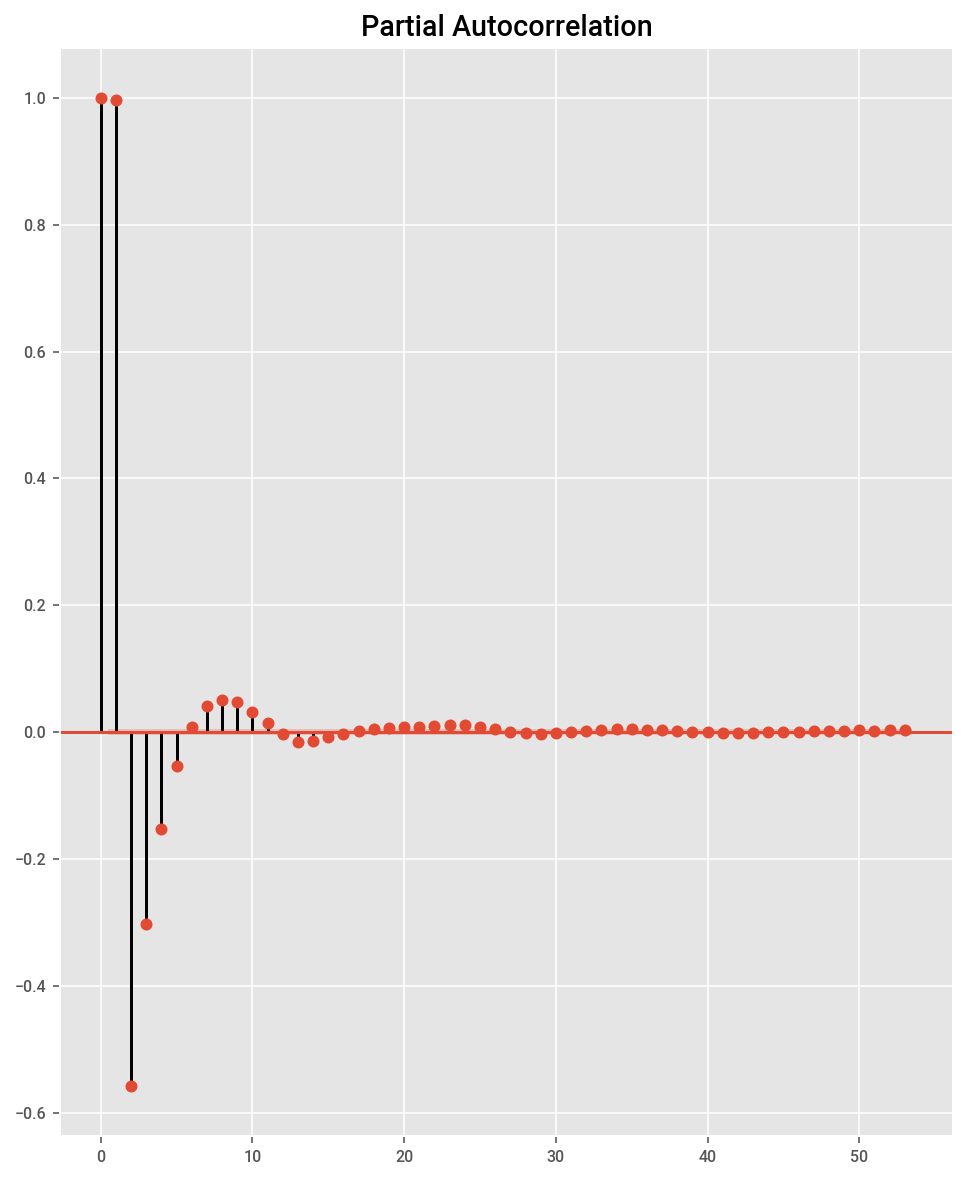

In [ ]:
plot_acf(df['Speed_10m'])
plot_pacf(df["Speed_10m"]);

# Data preparation

Input for the NN done with a function and an object.

In [ ]:
def prepare_dataset(data, window_size):
  y = []
  x = []
  for win in range(window_size, len(data)-1):
    y.append(data[win])
    x.append(data[win-window_size:win].values)
  vec = pd.DataFrame({'x': x, 'y': y})
  return vec

data = df['Speed_10m']
window_size = 3
sol = prepare_dataset(data[0:20], window_size)
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       16 non-null     object 
 1   y       16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
data[0:5]

0    3.30
1    3.23
2    3.17
3    3.12
4    3.07
Name: Speed_10m, dtype: float64

In [ ]:
class sample:
  def __init__(self, x, y):
    self.x = x
    self.y = y


def prepare_dataset_class(data, window_size):
  sampleList = []
  for win in range(window_size, len(data)-1):
    sampleList.append(sample(data[win-window_size:win].values,data[win]))
  return sampleList

data = df['Speed_10m']
window_size = 10
sol = prepare_dataset_class(data, window_size)
for obj in sol:
    print( obj.x, obj.y)

Se han truncado las últimas 5000 líneas del flujo de salida.
[3.58 3.6  3.59 3.56 3.51 3.44 3.37 3.3  3.23 3.16] 3.09
[3.6  3.59 3.56 3.51 3.44 3.37 3.3  3.23 3.16 3.09] 3.04
[3.59 3.56 3.51 3.44 3.37 3.3  3.23 3.16 3.09 3.04] 3.01
[3.56 3.51 3.44 3.37 3.3  3.23 3.16 3.09 3.04 3.01] 3.0
[3.51 3.44 3.37 3.3  3.23 3.16 3.09 3.04 3.01 3.  ] 3.01
[3.44 3.37 3.3  3.23 3.16 3.09 3.04 3.01 3.   3.01] 3.04
[3.37 3.3  3.23 3.16 3.09 3.04 3.01 3.   3.01 3.04] 3.08
[3.3  3.23 3.16 3.09 3.04 3.01 3.   3.01 3.04 3.08] 3.13
[3.23 3.16 3.09 3.04 3.01 3.   3.01 3.04 3.08 3.13] 3.19
[3.16 3.09 3.04 3.01 3.   3.01 3.04 3.08 3.13 3.19] 3.25
[3.09 3.04 3.01 3.   3.01 3.04 3.08 3.13 3.19 3.25] 3.31
[3.04 3.01 3.   3.01 3.04 3.08 3.13 3.19 3.25 3.31] 3.37
[3.01 3.   3.01 3.04 3.08 3.13 3.19 3.25 3.31 3.37] 3.42
[3.   3.01 3.04 3.08 3.13 3.19 3.25 3.31 3.37 3.42] 3.46
[3.01 3.04 3.08 3.13 3.19 3.25 3.31 3.37 3.42 3.46] 3.49
[3.04 3.08 3.13 3.19 3.25 3.31 3.37 3.42 3.46 3.49] 3.5
[3.08 3.13 3.19 3.25 3.31 3.3